In [1]:
import numpy as np
import pandas as pd
import os
import math

from sas7bdat import SAS7BDAT
import datetime

pd.set_option('display.max_rows', 300, 'display.max_columns', 300)
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import adabound
from pycox.evaluation.concordance import concordance_td
from sklearn.metrics import accuracy_score, roc_auc_score
from lifelines import KaplanMeierFitter, NelsonAalenFitter, AalenJohansenFitter

torch.cuda.is_available()

True

# Binary classification

In [44]:
class MLP(nn.Module):
    
    def __init__(self, input_size, hidden_size=128, num_layer=1, num_event=1):
        super(MLP, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layer = num_layer
        self.num_event = num_event
        
        self.hidden_in = nn.Linear(self.input_size, self.hidden_size)
        hiddens = [
            nn.Linear(self.hidden_size, self.hidden_size),
            nn.LeakyReLU(inplace=True),
        ]
        self.hiddens = nn.Sequential(*((num_layer-1)*hiddens))
        self.hidden_out = nn.Linear(self.hidden_size, self.num_event)
        self.activation = nn.LeakyReLU(inplace=True)
                
    def forward(self, x):
        ## x: (batch, input_size)

        batch_size = x.shape[0]
        x = self.hidden_in(x)
        x = self.hiddens(self.activation(x))
        x = self.hidden_out(x)
        
        return x

C:\Users\demel\anaconda3\envs\pytorch\lib\site-packages\adabound\adabound.py:94: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:1025.)
  exp_avg.mul_(beta1).add_(1 - beta1, grad)


Epoch: 0, Loss: 6.3356e-01
Epoch: 100, Loss: 2.4425e-01
Epoch: 200, Loss: 2.2507e-01
Epoch: 300, Loss: 2.1267e-01
Epoch: 400, Loss: 2.1606e-01
Epoch: 500, Loss: 2.1079e-01
Epoch: 600, Loss: 2.0727e-01
Epoch: 700, Loss: 2.0442e-01
Epoch: 800, Loss: 1.9893e-01
Epoch: 900, Loss: 2.0145e-01
Epoch: 1000, Loss: 2.0692e-01
Epoch: 1100, Loss: 1.9908e-01
Epoch: 1200, Loss: 1.9480e-01
Epoch: 1300, Loss: 1.9588e-01
Epoch: 1400, Loss: 1.8794e-01
Epoch: 1500, Loss: 1.8889e-01
Epoch: 1600, Loss: 1.9082e-01
Epoch: 1700, Loss: 1.8323e-01
Epoch: 1800, Loss: 1.7965e-01
Epoch: 1900, Loss: 1.6862e-01
Epoch: 2000, Loss: 1.6797e-01
Epoch: 2100, Loss: 1.5902e-01
Epoch: 2200, Loss: 1.5383e-01
Epoch: 2300, Loss: 1.5174e-01
Epoch: 2400, Loss: 1.3900e-01
Epoch: 2500, Loss: 1.4452e-01
Epoch: 2600, Loss: 1.3952e-01
Epoch: 2700, Loss: 1.3356e-01
Epoch: 2800, Loss: 1.2674e-01
Epoch: 2900, Loss: 1.2830e-01
Epoch: 3000, Loss: 1.3113e-01
Epoch: 3100, Loss: 1.1958e-01
Epoch: 3200, Loss: 1.2105e-01
Epoch: 3300, Loss: 1.1

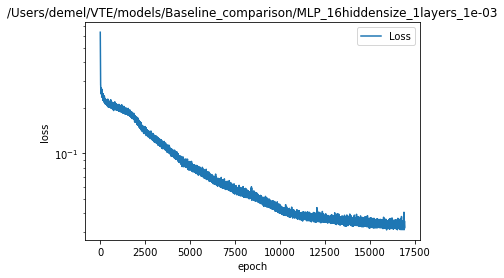

odels/Baseline_comparison/MLP_16hiddensize_1layers_1e-03
Train accuracy = 0.9926, Test accuracy = 0.8881
VTE Train AUC = 0.9998, Test AUC = 0.7234
Epoch: 0, Loss: 7.4826e-01
Epoch: 100, Loss: 2.4508e-01
Epoch: 200, Loss: 2.2623e-01
Epoch: 300, Loss: 2.1634e-01
Epoch: 400, Loss: 2.0522e-01
Epoch: 500, Loss: 2.0366e-01
Epoch: 600, Loss: 1.9414e-01
Epoch: 700, Loss: 1.9389e-01
Epoch: 800, Loss: 1.9613e-01
Epoch: 900, Loss: 1.7879e-01
Epoch: 1000, Loss: 1.7092e-01
Epoch: 1100, Loss: 1.6164e-01
Epoch: 1200, Loss: 1.3276e-01
Epoch: 1300, Loss: 1.1041e-01
Epoch: 1400, Loss: 9.7052e-02
Epoch: 1500, Loss: 7.8538e-02
Epoch: 1600, Loss: 6.7909e-02
Epoch: 1700, Loss: 4.9585e-02
Epoch: 1800, Loss: 4.4255e-02
Epoch: 1900, Loss: 3.6846e-02
Epoch: 2000, Loss: 3.2072e-02
Epoch: 2100, Loss: 2.7712e-02
Epoch: 2200, Loss: 2.4306e-02
Epoch: 2300, Loss: 2.3821e-02
Epoch: 2400, Loss: 1.9077e-02
Epoch: 2500, Loss: 2.0960e-02
Epoch: 2600, Loss: 1.7495e-02
Epoch: 2700, Loss: 1.7776e-02
Epoch: 2800, Loss: 1.7429

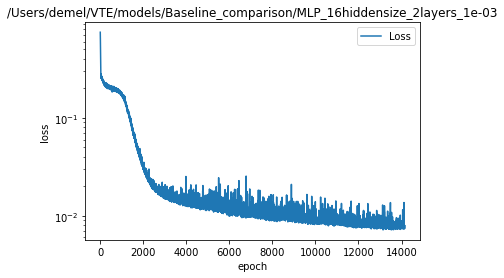

odels/Baseline_comparison/MLP_16hiddensize_2layers_1e-03
Train accuracy = 1.0000, Test accuracy = 0.8661
VTE Train AUC = 1.0000, Test AUC = 0.7176
Epoch: 0, Loss: 6.1139e-01
Epoch: 100, Loss: 2.5224e-01
Epoch: 200, Loss: 2.1777e-01
Epoch: 300, Loss: 2.1331e-01
Epoch: 400, Loss: 2.0629e-01
Epoch: 500, Loss: 1.9337e-01
Epoch: 600, Loss: 1.8880e-01
Epoch: 700, Loss: 1.4631e-01
Epoch: 800, Loss: 9.1312e-02
Epoch: 900, Loss: 5.0726e-02
Epoch: 1000, Loss: 3.3150e-02
Epoch: 1100, Loss: 2.7475e-02
Epoch: 1200, Loss: 2.4067e-02
Epoch: 1300, Loss: 1.9997e-02
Epoch: 1400, Loss: 1.5772e-02
Epoch: 1500, Loss: 1.6296e-02
Epoch: 1600, Loss: 1.4259e-02
Epoch: 1700, Loss: 1.2594e-02
Epoch: 1800, Loss: 1.1598e-02
Epoch: 1900, Loss: 1.1620e-02
Epoch: 2000, Loss: 1.0881e-02
Epoch: 2100, Loss: 8.2846e-03
Epoch: 2200, Loss: 8.1585e-03
Epoch: 2300, Loss: 8.0660e-03
Epoch: 2400, Loss: 8.3037e-03
Epoch: 2500, Loss: 9.3030e-03
Epoch: 2600, Loss: 7.7231e-03
Epoch: 2700, Loss: 8.3532e-03
Epoch: 2800, Loss: 7.0888

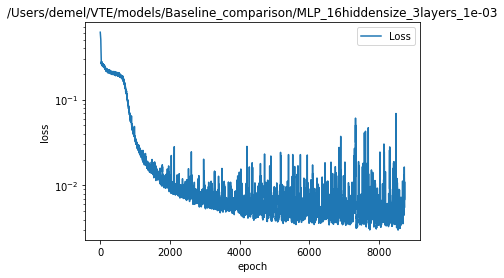

odels/Baseline_comparison/MLP_16hiddensize_3layers_1e-03
Train accuracy = 1.0000, Test accuracy = 0.8729
VTE Train AUC = 1.0000, Test AUC = 0.7185
Epoch: 0, Loss: 8.2459e-01
Epoch: 100, Loss: 2.5091e-01
Epoch: 200, Loss: 2.3791e-01
Epoch: 300, Loss: 2.1282e-01
Epoch: 400, Loss: 2.1721e-01
Epoch: 500, Loss: 2.0880e-01
Epoch: 600, Loss: 2.0053e-01
Epoch: 700, Loss: 2.0196e-01
Epoch: 800, Loss: 1.9773e-01
Epoch: 900, Loss: 1.9579e-01
Epoch: 1000, Loss: 2.0237e-01
Epoch: 1100, Loss: 2.0397e-01
Epoch: 1200, Loss: 2.0093e-01
Epoch: 1300, Loss: 2.0011e-01
Epoch: 1400, Loss: 1.9276e-01
Epoch: 1500, Loss: 1.9689e-01
Epoch: 1600, Loss: 1.9977e-01
Epoch: 1700, Loss: 1.8959e-01
Epoch: 1800, Loss: 1.9451e-01
Epoch: 1900, Loss: 1.9563e-01
Epoch: 2000, Loss: 1.9257e-01
Epoch: 2100, Loss: 1.9946e-01
Epoch: 2200, Loss: 1.8860e-01
Epoch: 2300, Loss: 1.8924e-01
Epoch: 2400, Loss: 1.9469e-01
Epoch: 2500, Loss: 1.9123e-01
Epoch: 2600, Loss: 1.9553e-01
Epoch: 2700, Loss: 1.9008e-01
Epoch: 2800, Loss: 1.9315

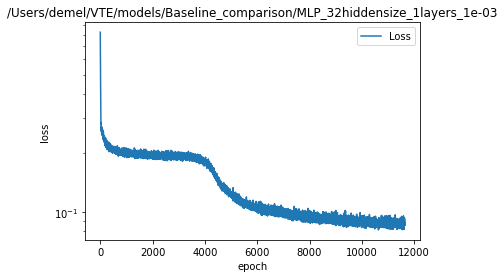

odels/Baseline_comparison/MLP_32hiddensize_1layers_1e-03
Train accuracy = 0.9720, Test accuracy = 0.8695
VTE Train AUC = 0.9826, Test AUC = 0.7486
Epoch: 0, Loss: 6.7975e-01
Epoch: 100, Loss: 2.4021e-01
Epoch: 200, Loss: 2.2007e-01
Epoch: 300, Loss: 2.1265e-01
Epoch: 400, Loss: 2.0571e-01
Epoch: 500, Loss: 1.9392e-01
Epoch: 600, Loss: 1.8834e-01
Epoch: 700, Loss: 1.9625e-01
Epoch: 800, Loss: 1.8698e-01
Epoch: 900, Loss: 1.7126e-01
Epoch: 1000, Loss: 1.5621e-01
Epoch: 1100, Loss: 1.5042e-01
Epoch: 1200, Loss: 1.3607e-01
Epoch: 1300, Loss: 1.3004e-01
Epoch: 1400, Loss: 1.1695e-01
Epoch: 1500, Loss: 1.0846e-01
Epoch: 1600, Loss: 9.5116e-02
Epoch: 1700, Loss: 8.6756e-02
Epoch: 1800, Loss: 7.5106e-02
Epoch: 1900, Loss: 6.7968e-02
Epoch: 2000, Loss: 6.5812e-02
Epoch: 2100, Loss: 5.7817e-02
Epoch: 2200, Loss: 5.0327e-02
Epoch: 2300, Loss: 4.7840e-02
Epoch: 2400, Loss: 4.5316e-02
Epoch: 2500, Loss: 4.3674e-02
Epoch: 2600, Loss: 3.7670e-02
Epoch: 2700, Loss: 3.4964e-02
Epoch: 2800, Loss: 3.7546

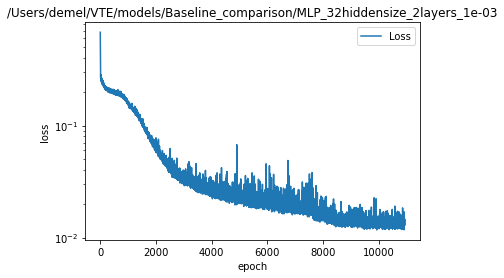

odels/Baseline_comparison/MLP_32hiddensize_2layers_1e-03
Train accuracy = 0.9985, Test accuracy = 0.8661
VTE Train AUC = 0.9985, Test AUC = 0.7318
Epoch: 0, Loss: 7.6133e-01
Epoch: 100, Loss: 2.3648e-01
Epoch: 200, Loss: 2.1576e-01
Epoch: 300, Loss: 2.0092e-01
Epoch: 400, Loss: 2.0831e-01
Epoch: 500, Loss: 2.0191e-01
Epoch: 600, Loss: 2.0245e-01
Epoch: 700, Loss: 1.8512e-01
Epoch: 800, Loss: 1.7761e-01
Epoch: 900, Loss: 1.5462e-01
Epoch: 1000, Loss: 1.0268e-01
Epoch: 1100, Loss: 6.4427e-02
Epoch: 1200, Loss: 4.1520e-02
Epoch: 1300, Loss: 3.2648e-02
Epoch: 1400, Loss: 2.4830e-02
Epoch: 1500, Loss: 1.9883e-02
Epoch: 1600, Loss: 1.7705e-02
Epoch: 1700, Loss: 1.4887e-02
Epoch: 1800, Loss: 1.9752e-02
Epoch: 1900, Loss: 1.4740e-02
Epoch: 2000, Loss: 1.1046e-02
Epoch: 2100, Loss: 1.1014e-02
Epoch: 2200, Loss: 1.0175e-02
Epoch: 2300, Loss: 9.9583e-03
Epoch: 2400, Loss: 8.2733e-03
Epoch: 2500, Loss: 8.2556e-03
Epoch: 2600, Loss: 8.0866e-03
Epoch: 2700, Loss: 7.9496e-03
Epoch: 2800, Loss: 8.6963

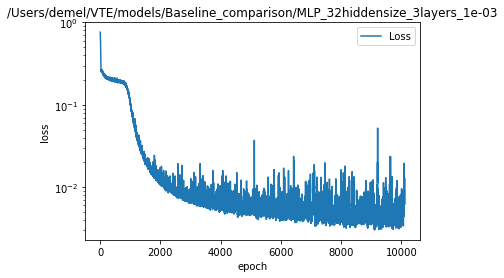

odels/Baseline_comparison/MLP_32hiddensize_3layers_1e-03
Train accuracy = 1.0000, Test accuracy = 0.8644
VTE Train AUC = 1.0000, Test AUC = 0.7099
Epoch: 0, Loss: 7.1923e-01
Epoch: 100, Loss: 2.3796e-01
Epoch: 200, Loss: 2.2059e-01
Epoch: 300, Loss: 2.1047e-01
Epoch: 400, Loss: 2.0330e-01
Epoch: 500, Loss: 2.0591e-01
Epoch: 600, Loss: 2.0748e-01
Epoch: 700, Loss: 2.0060e-01
Epoch: 800, Loss: 2.0287e-01
Epoch: 900, Loss: 1.9796e-01
Epoch: 1000, Loss: 2.0506e-01
Epoch: 1100, Loss: 1.9990e-01
Epoch: 1200, Loss: 1.9768e-01
Epoch: 1300, Loss: 1.9432e-01
Epoch: 1400, Loss: 2.0312e-01
Epoch: 1500, Loss: 1.9279e-01
Epoch: 1600, Loss: 1.9558e-01
Epoch: 1700, Loss: 1.9926e-01
Epoch: 1800, Loss: 1.9394e-01
Epoch: 1900, Loss: 1.9277e-01
Epoch: 2000, Loss: 1.9886e-01
Epoch: 2100, Loss: 1.8352e-01
Epoch: 2200, Loss: 1.9275e-01
Epoch: 2300, Loss: 1.9296e-01
Epoch: 2400, Loss: 1.9238e-01
Epoch: 2500, Loss: 1.9325e-01
Epoch: 2600, Loss: 1.8700e-01
Epoch: 2700, Loss: 1.9573e-01
Epoch: 2800, Loss: 1.8401

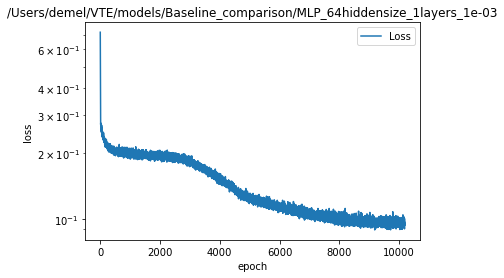

odels/Baseline_comparison/MLP_64hiddensize_1layers_1e-03
Train accuracy = 0.9676, Test accuracy = 0.8746
VTE Train AUC = 0.9769, Test AUC = 0.7291
Epoch: 0, Loss: 6.4903e-01
Epoch: 100, Loss: 2.3785e-01
Epoch: 200, Loss: 2.1544e-01
Epoch: 300, Loss: 2.0478e-01
Epoch: 400, Loss: 2.0550e-01
Epoch: 500, Loss: 2.0261e-01
Epoch: 600, Loss: 1.9928e-01
Epoch: 700, Loss: 2.0335e-01
Epoch: 800, Loss: 1.8789e-01
Epoch: 900, Loss: 1.9098e-01
Epoch: 1000, Loss: 1.8494e-01
Epoch: 1100, Loss: 1.7920e-01
Epoch: 1200, Loss: 1.5773e-01
Epoch: 1300, Loss: 1.4389e-01
Epoch: 1400, Loss: 1.2823e-01
Epoch: 1500, Loss: 1.1230e-01
Epoch: 1600, Loss: 1.0421e-01
Epoch: 1700, Loss: 9.3042e-02
Epoch: 1800, Loss: 7.8741e-02
Epoch: 1900, Loss: 6.8701e-02
Epoch: 2000, Loss: 5.9218e-02
Epoch: 2100, Loss: 5.5121e-02
Epoch: 2200, Loss: 5.1341e-02
Epoch: 2300, Loss: 4.6707e-02
Epoch: 2400, Loss: 4.2197e-02
Epoch: 2500, Loss: 4.3760e-02
Epoch: 2600, Loss: 5.5548e-02
Epoch: 2700, Loss: 3.4747e-02
Epoch: 2800, Loss: 3.4790

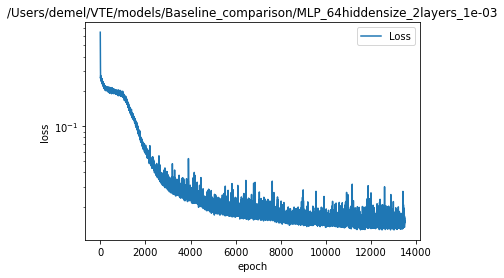

odels/Baseline_comparison/MLP_64hiddensize_2layers_1e-03
Train accuracy = 0.9985, Test accuracy = 0.8729
VTE Train AUC = 0.9985, Test AUC = 0.7695
Epoch: 0, Loss: 7.0569e-01
Epoch: 100, Loss: 2.2265e-01
Epoch: 200, Loss: 2.0996e-01
Epoch: 300, Loss: 2.0718e-01
Epoch: 400, Loss: 1.8543e-01
Epoch: 500, Loss: 1.6991e-01
Epoch: 600, Loss: 1.1102e-01
Epoch: 700, Loss: 5.7528e-02
Epoch: 800, Loss: 4.2553e-02
Epoch: 900, Loss: 2.8816e-02
Epoch: 1000, Loss: 2.5091e-02
Epoch: 1100, Loss: 1.8739e-02
Epoch: 1200, Loss: 1.7171e-02
Epoch: 1300, Loss: 1.4284e-02
Epoch: 1400, Loss: 1.4876e-02
Epoch: 1500, Loss: 1.2508e-02
Epoch: 1600, Loss: 1.1556e-02
Epoch: 1700, Loss: 1.0587e-02
Epoch: 1800, Loss: 1.0289e-02
Epoch: 1900, Loss: 1.2292e-02
Epoch: 2000, Loss: 9.6012e-03
Epoch: 2100, Loss: 8.0801e-03
Epoch: 2200, Loss: 1.2294e-02
Epoch: 2300, Loss: 7.6426e-03
Epoch: 2400, Loss: 7.6963e-03
Epoch: 2500, Loss: 6.6888e-03
Epoch: 2600, Loss: 7.2996e-03
Epoch: 2700, Loss: 8.5781e-03
Epoch: 2800, Loss: 6.2100

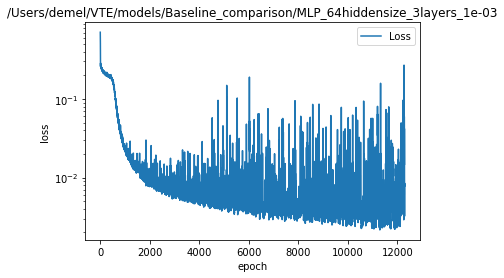

odels/Baseline_comparison/MLP_64hiddensize_3layers_1e-03
Train accuracy = 1.0000, Test accuracy = 0.8814
VTE Train AUC = 1.0000, Test AUC = 0.7262
Epoch: 0, Loss: 6.4865e-01
Epoch: 100, Loss: 2.3209e-01
Epoch: 200, Loss: 2.2709e-01
Epoch: 300, Loss: 2.1107e-01
Epoch: 400, Loss: 2.1180e-01
Epoch: 500, Loss: 1.9881e-01
Epoch: 600, Loss: 2.0688e-01
Epoch: 700, Loss: 1.9560e-01
Epoch: 800, Loss: 1.9980e-01
Epoch: 900, Loss: 1.9753e-01
Epoch: 1000, Loss: 1.9225e-01
Epoch: 1100, Loss: 1.8743e-01
Epoch: 1200, Loss: 1.7993e-01
Epoch: 1300, Loss: 1.8634e-01
Epoch: 1400, Loss: 1.7811e-01
Epoch: 1500, Loss: 1.6969e-01
Epoch: 1600, Loss: 1.6219e-01
Epoch: 1700, Loss: 1.5833e-01
Epoch: 1800, Loss: 1.5107e-01
Epoch: 1900, Loss: 1.4325e-01
Epoch: 2000, Loss: 1.3804e-01
Epoch: 2100, Loss: 1.3141e-01
Epoch: 2200, Loss: 1.2904e-01
Epoch: 2300, Loss: 1.2422e-01
Epoch: 2400, Loss: 1.1624e-01
Epoch: 2500, Loss: 1.1111e-01
Epoch: 2600, Loss: 1.1591e-01
Epoch: 2700, Loss: 1.0489e-01
Epoch: 2800, Loss: 9.8937

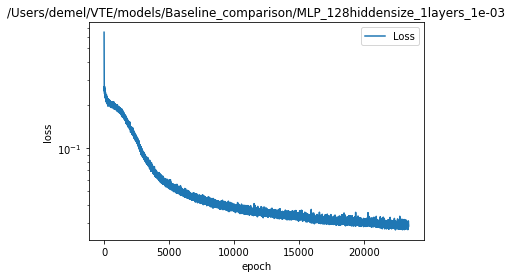

odels/Baseline_comparison/MLP_128hiddensize_1layers_1e-03
Train accuracy = 0.9971, Test accuracy = 0.8847
VTE Train AUC = 1.0000, Test AUC = 0.7525
Epoch: 0, Loss: 7.0676e-01
Epoch: 100, Loss: 2.3050e-01
Epoch: 200, Loss: 2.0629e-01
Epoch: 300, Loss: 2.0313e-01
Epoch: 400, Loss: 1.9973e-01
Epoch: 500, Loss: 1.9561e-01
Epoch: 600, Loss: 1.9869e-01
Epoch: 700, Loss: 1.9583e-01
Epoch: 800, Loss: 1.8909e-01
Epoch: 900, Loss: 1.9036e-01
Epoch: 1000, Loss: 1.9717e-01
Epoch: 1100, Loss: 1.9318e-01
Epoch: 1200, Loss: 1.9404e-01
Epoch: 1300, Loss: 1.9690e-01
Epoch: 1400, Loss: 1.8435e-01
Epoch: 1500, Loss: 1.8276e-01
Epoch: 1600, Loss: 1.9195e-01
Epoch: 1700, Loss: 1.9034e-01
Epoch: 1800, Loss: 1.8328e-01
Epoch: 1900, Loss: 1.9403e-01
Epoch: 2000, Loss: 1.8817e-01
Epoch: 2100, Loss: 1.9020e-01
Epoch: 2200, Loss: 1.9217e-01
Epoch: 2300, Loss: 1.8950e-01
Epoch: 2400, Loss: 2.0511e-01
Epoch: 2500, Loss: 1.8621e-01
Epoch: 2600, Loss: 1.9276e-01
Epoch: 2700, Loss: 1.8313e-01
Epoch: 2800, Loss: 1.835

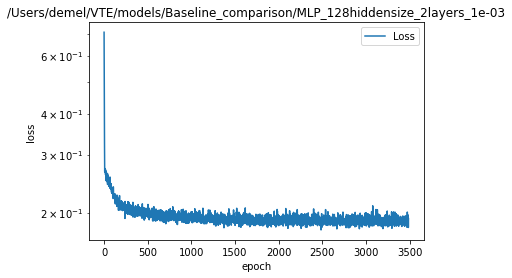

odels/Baseline_comparison/MLP_128hiddensize_2layers_1e-03
Train accuracy = 0.9366, Test accuracy = 0.9119
VTE Train AUC = 0.8765, Test AUC = 0.8103
Epoch: 0, Loss: 6.4817e-01
Epoch: 100, Loss: 2.2918e-01
Epoch: 200, Loss: 2.0498e-01
Epoch: 300, Loss: 1.9478e-01
Epoch: 400, Loss: 1.9326e-01
Epoch: 500, Loss: 1.5508e-01
Epoch: 600, Loss: 9.5519e-02
Epoch: 700, Loss: 5.4248e-02
Epoch: 800, Loss: 3.5322e-02
Epoch: 900, Loss: 2.7870e-02
Epoch: 1000, Loss: 2.0998e-02
Epoch: 1100, Loss: 2.0242e-02
Epoch: 1200, Loss: 1.5634e-02
Epoch: 1300, Loss: 1.5559e-02
Epoch: 1400, Loss: 1.8113e-02
Epoch: 1500, Loss: 1.3914e-02
Epoch: 1600, Loss: 1.1155e-02
Epoch: 1700, Loss: 1.1291e-02
Epoch: 1800, Loss: 9.6661e-03
Epoch: 1900, Loss: 1.0346e-02
Epoch: 2000, Loss: 8.4794e-03
Epoch: 2100, Loss: 1.6714e-02
Epoch: 2200, Loss: 1.5760e-02
Epoch: 2300, Loss: 1.1318e-02
Epoch: 2400, Loss: 7.6677e-03
Epoch: 2500, Loss: 1.2055e-02
Epoch: 2600, Loss: 7.0386e-03
Epoch: 2700, Loss: 1.2726e-02
Epoch: 2800, Loss: 8.683

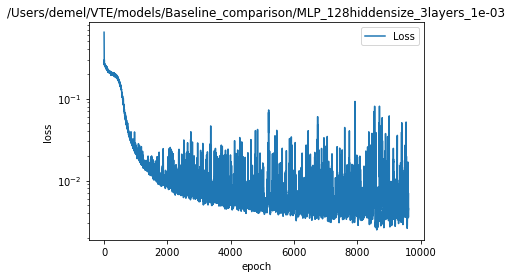

odels/Baseline_comparison/MLP_128hiddensize_3layers_1e-03
Train accuracy = 1.0000, Test accuracy = 0.8763
VTE Train AUC = 1.0000, Test AUC = 0.7487
Epoch: 0, Loss: 6.9720e-01
Epoch: 100, Loss: 2.3662e-01
Epoch: 200, Loss: 2.1047e-01
Epoch: 300, Loss: 2.0589e-01
Epoch: 400, Loss: 2.1612e-01
Epoch: 500, Loss: 1.9976e-01
Epoch: 600, Loss: 2.0403e-01
Epoch: 700, Loss: 2.0035e-01
Epoch: 800, Loss: 1.9556e-01
Epoch: 900, Loss: 1.9793e-01
Epoch: 1000, Loss: 2.0849e-01
Epoch: 1100, Loss: 2.0112e-01
Epoch: 1200, Loss: 1.9996e-01
Epoch: 1300, Loss: 1.9923e-01
Epoch: 1400, Loss: 1.9187e-01
Epoch: 1500, Loss: 1.9642e-01
Epoch: 1600, Loss: 1.9259e-01
Epoch: 1700, Loss: 2.0078e-01
Epoch: 1800, Loss: 2.0079e-01
Epoch: 1900, Loss: 2.0239e-01
Epoch: 2000, Loss: 1.9581e-01
Epoch: 2100, Loss: 1.9202e-01
Epoch: 2200, Loss: 1.9392e-01
Epoch: 2300, Loss: 1.8848e-01
Epoch: 2400, Loss: 1.9859e-01
Epoch: 2500, Loss: 1.9188e-01
Epoch: 2600, Loss: 1.8394e-01
Epoch: 2700, Loss: 1.8796e-01
Epoch: 2800, Loss: 1.825

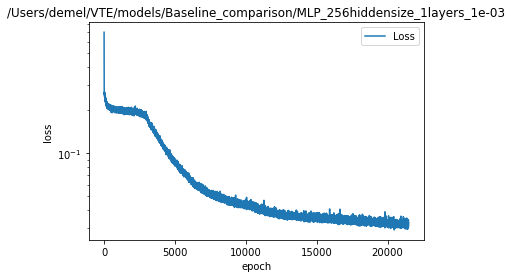

odels/Baseline_comparison/MLP_256hiddensize_1layers_1e-03
Train accuracy = 0.9926, Test accuracy = 0.8610
VTE Train AUC = 1.0000, Test AUC = 0.7485
Epoch: 0, Loss: 6.2425e-01
Epoch: 100, Loss: 2.2760e-01
Epoch: 200, Loss: 2.1070e-01
Epoch: 300, Loss: 2.0537e-01
Epoch: 400, Loss: 2.0377e-01
Epoch: 500, Loss: 2.0095e-01
Epoch: 600, Loss: 2.0027e-01
Epoch: 700, Loss: 1.9463e-01
Epoch: 800, Loss: 1.9019e-01
Epoch: 900, Loss: 1.9715e-01
Epoch: 1000, Loss: 1.9705e-01
Epoch: 1100, Loss: 1.8770e-01
Epoch: 1200, Loss: 1.8705e-01
Epoch: 1300, Loss: 1.9286e-01
Epoch: 1400, Loss: 1.8326e-01
Epoch: 1500, Loss: 1.8598e-01
Epoch: 1600, Loss: 1.8908e-01
Epoch: 1700, Loss: 1.9010e-01
Epoch: 1800, Loss: 1.9226e-01
Epoch: 1900, Loss: 1.9959e-01
Epoch: 2000, Loss: 1.9294e-01
Epoch: 2100, Loss: 1.9392e-01
Epoch: 2200, Loss: 1.9160e-01
Epoch: 2300, Loss: 1.9024e-01
Epoch: 2400, Loss: 1.8365e-01
Epoch: 2500, Loss: 1.8605e-01
Epoch: 2600, Loss: 1.8176e-01
Epoch: 2700, Loss: 1.8998e-01
Epoch: 2800, Loss: 1.872

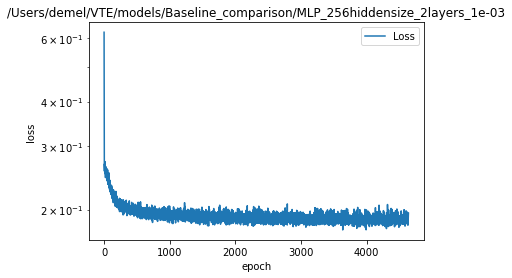

odels/Baseline_comparison/MLP_256hiddensize_2layers_1e-03
Train accuracy = 0.9381, Test accuracy = 0.9136
VTE Train AUC = 0.8780, Test AUC = 0.8115
Epoch: 0, Loss: 6.6921e-01
Epoch: 100, Loss: 2.3139e-01
Epoch: 200, Loss: 2.1062e-01
Epoch: 300, Loss: 1.9936e-01
Epoch: 400, Loss: 1.8770e-01
Epoch: 500, Loss: 1.6832e-01
Epoch: 600, Loss: 1.0597e-01
Epoch: 700, Loss: 5.3592e-02
Epoch: 800, Loss: 3.5373e-02
Epoch: 900, Loss: 2.6592e-02
Epoch: 1000, Loss: 2.1967e-02
Epoch: 1100, Loss: 1.8226e-02
Epoch: 1200, Loss: 1.5917e-02
Epoch: 1300, Loss: 1.3601e-02
Epoch: 1400, Loss: 1.2891e-02
Epoch: 1500, Loss: 1.1099e-02
Epoch: 1600, Loss: 1.0675e-02
Epoch: 1700, Loss: 8.7666e-03
Epoch: 1800, Loss: 8.1642e-03
Epoch: 1900, Loss: 8.4427e-03
Epoch: 2000, Loss: 8.3251e-03
Epoch: 2100, Loss: 6.8873e-03
Epoch: 2200, Loss: 9.2286e-03
Epoch: 2300, Loss: 7.7468e-03
Epoch: 2400, Loss: 6.1153e-03
Epoch: 2500, Loss: 6.5105e-03
Epoch: 2600, Loss: 6.2254e-03
Epoch: 2700, Loss: 6.1042e-03
Epoch: 2800, Loss: 7.127

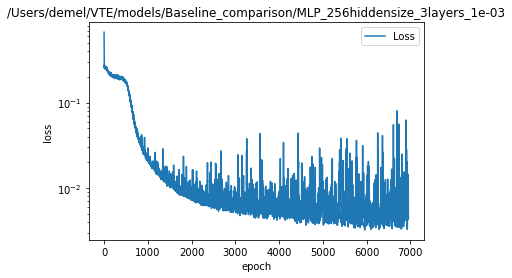

odels/Baseline_comparison/MLP_256hiddensize_3layers_1e-03
Train accuracy = 1.0000, Test accuracy = 0.8763
VTE Train AUC = 1.0000, Test AUC = 0.7274


In [45]:
criterion = nn.BCEWithLogitsLoss()

for weight_decay in [1e-3]:
    for hidden_size in [16, 32, 64, 128, 256]:
        for num_layer in [1, 2, 3]:
            
            path = './MLP_{}hiddensize_{}layers_{:.0e}'.format(hidden_size, num_layer, weight_decay)
            #if os.path.isfile(path):
            #    continue

            model = MLP(input_size=total_train.shape[-1], hidden_size=hidden_size, num_layer=num_layer, num_event=num_event).to(device)
            #if os.path.isfile(path):
            #    model.load_state_dict(torch.load(path, map_location = device))

            lr = 1e-3
            optimizer = adabound.AdaBound(model.parameters(), lr=lr, weight_decay=0)

            loss_array = []
            patience = 0
            min_loss = np.inf
            for e in range(int(1e6)):

                loss_array_tmp = []

                for total_batch, timevar_compact_batch, event_batch, time_batch, obs_mask_batch in train_loader:

                    total_batch = total_batch.float()
                    event_batch = event_batch.reshape(-1,1).float()

                    y_pred = model(total_batch.to(device))

                    norm = 0.
                    for parameter in model.parameters():
                        norm += torch.norm(parameter, p=1)

                    loss1 = criterion(y_pred, event_batch.to(device))

                    loss = loss1 + weight_decay*norm
                    loss_array_tmp.append(loss1.item())

                    model.zero_grad()

                    loss.backward()

                    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.)
                    optimizer.step()

                loss_array.append(np.mean(loss_array_tmp))
                if e % 100 == 0:
                    print('Epoch: ' + str(e) + 
                          ', Loss: '+ f'{loss_array[-1]:.4e}')
                if min_loss > loss_array[-1]:
                    patience = 0
                    min_loss = loss_array[-1]
                    torch.save(model.state_dict(), path)
                else:
                    patience += 1

                torch.cuda.empty_cache()

                if patience > 1000:
                    break

            plt.plot(loss_array, label='Loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.yscale('log')
            plt.title(path[2:])
            plt.legend()
            plt.show()

            total_train_sort = torch.FloatTensor(total_train)
            total_test_sort = torch.FloatTensor(total_test)

            model.load_state_dict(torch.load(path, map_location = device))

            y_train = torch.sigmoid(model(total_train_sort.to(device))).detach().cpu().numpy()
            y_test = torch.sigmoid(model(total_test_sort.to(device))).detach().cpu().numpy()

            out_pred = np.where(y_train >= 0.5, 1, 0)
            acc_train = accuracy_score(event_train, out_pred.flatten())
            auc_train = roc_auc_score(event_train, y_train.flatten())
                        
            out_pred = np.where(y_test >= 0.5, 1, 0)
            acc_test = accuracy_score(event_test, out_pred.flatten())
            auc_test = roc_auc_score(event_test, y_test.flatten())
            
            print('Train accuracy = {:.4f}, Test accuracy = {:.4f}'.format(acc_train, acc_test))
            print('VTE Train AUC = {:.4f}, Test AUC = {:.4f}'.format(auc_train, auc_test))       

# Multi-class classification

In [54]:
class multiMLP(nn.Module):
    
    def __init__(self, input_size, hidden_size=128, num_layer=1, num_event=2):
        super(multiMLP, self).__init__()
        
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layer = num_layer
        self.num_event = num_event
        
        self.hidden_in = nn.Linear(self.input_size, self.hidden_size)
        hiddens = [
            nn.Linear(self.hidden_size, self.hidden_size),
            nn.LeakyReLU(inplace=True),
        ]
        self.hiddens = nn.Sequential(*((num_layer-1)*hiddens))
        self.hidden_out = nn.Linear(self.hidden_size, self.num_event+1)
        self.activation = nn.LeakyReLU(inplace=True)
                
    def forward(self, x):
        ## x: (batch, input_size)

        batch_size = x.shape[0]
        x = self.hidden_in(x)
        x = self.hiddens(self.activation(x))
        x = self.hidden_out(x)
        
        return x

Epoch: 0, Loss: 1.4888e+00
Epoch: 100, Loss: 2.5491e-01
Epoch: 200, Loss: 2.3206e-01
Epoch: 300, Loss: 2.1746e-01
Epoch: 400, Loss: 2.0979e-01
Epoch: 500, Loss: 2.0376e-01
Epoch: 600, Loss: 2.0245e-01
Epoch: 700, Loss: 1.9440e-01
Epoch: 800, Loss: 1.9633e-01
Epoch: 900, Loss: 1.9415e-01
Epoch: 1000, Loss: 1.9787e-01
Epoch: 1100, Loss: 1.9545e-01
Epoch: 1200, Loss: 1.9351e-01
Epoch: 1300, Loss: 1.9805e-01
Epoch: 1400, Loss: 2.0728e-01
Epoch: 1500, Loss: 2.0558e-01
Epoch: 1600, Loss: 1.8794e-01
Epoch: 1700, Loss: 1.8721e-01
Epoch: 1800, Loss: 1.8900e-01
Epoch: 1900, Loss: 1.9617e-01
Epoch: 2000, Loss: 2.0040e-01
Epoch: 2100, Loss: 1.9503e-01
Epoch: 2200, Loss: 1.9958e-01
Epoch: 2300, Loss: 2.0064e-01
Epoch: 2400, Loss: 1.9390e-01
Epoch: 2500, Loss: 2.0050e-01
Epoch: 2600, Loss: 1.9081e-01
Epoch: 2700, Loss: 1.9771e-01
Epoch: 2800, Loss: 1.9114e-01
Epoch: 2900, Loss: 1.8788e-01
Epoch: 3000, Loss: 1.9296e-01
Epoch: 3100, Loss: 1.8686e-01


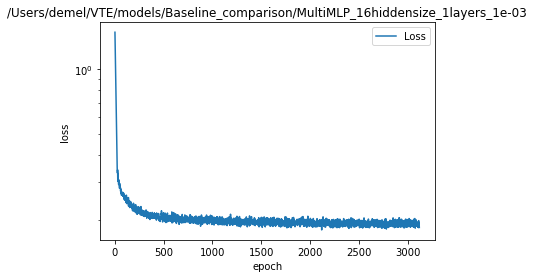

odels/Baseline_comparison/MultiMLP_16hiddensize_1layers_1e-03
Train accuracy = 0.8555, Test accuracy = 0.8559
VTE Train AUC = 0.8623, Test AUC = 0.8049
Death Train AUC = 0.5575, Test AUC = 0.4440
Epoch: 0, Loss: 1.0001e+00
Epoch: 100, Loss: 2.4538e-01
Epoch: 200, Loss: 2.0739e-01
Epoch: 300, Loss: 1.9563e-01
Epoch: 400, Loss: 1.9750e-01
Epoch: 500, Loss: 1.9155e-01
Epoch: 600, Loss: 1.9651e-01
Epoch: 700, Loss: 1.8794e-01
Epoch: 800, Loss: 1.8308e-01
Epoch: 900, Loss: 1.8130e-01
Epoch: 1000, Loss: 1.9443e-01
Epoch: 1100, Loss: 1.8629e-01
Epoch: 1200, Loss: 1.8488e-01
Epoch: 1300, Loss: 1.8580e-01
Epoch: 1400, Loss: 1.8880e-01
Epoch: 1500, Loss: 1.7668e-01
Epoch: 1600, Loss: 1.8098e-01
Epoch: 1700, Loss: 1.7275e-01
Epoch: 1800, Loss: 1.8144e-01
Epoch: 1900, Loss: 1.8148e-01
Epoch: 2000, Loss: 1.8293e-01
Epoch: 2100, Loss: 1.7793e-01
Epoch: 2200, Loss: 1.8046e-01
Epoch: 2300, Loss: 1.8012e-01
Epoch: 2400, Loss: 1.8040e-01
Epoch: 2500, Loss: 1.8802e-01
Epoch: 2600, Loss: 1.7846e-01
Epoch:

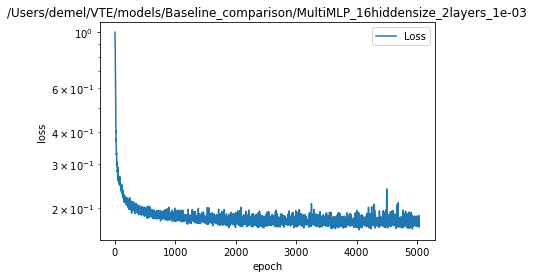

odels/Baseline_comparison/MultiMLP_16hiddensize_2layers_1e-03
Train accuracy = 0.8569, Test accuracy = 0.8508
VTE Train AUC = 0.9008, Test AUC = 0.8021
Death Train AUC = 0.5131, Test AUC = 0.4453
Epoch: 0, Loss: 1.0516e+00
Epoch: 100, Loss: 2.5441e-01
Epoch: 200, Loss: 2.3153e-01
Epoch: 300, Loss: 2.2364e-01
Epoch: 400, Loss: 2.1030e-01
Epoch: 500, Loss: 2.0853e-01
Epoch: 600, Loss: 1.8966e-01
Epoch: 700, Loss: 1.7891e-01
Epoch: 800, Loss: 1.6499e-01
Epoch: 900, Loss: 1.1848e-01
Epoch: 1000, Loss: 8.5523e-02
Epoch: 1100, Loss: 4.1743e-02
Epoch: 1200, Loss: 2.7001e-02
Epoch: 1300, Loss: 1.6433e-02
Epoch: 1400, Loss: 1.3882e-02
Epoch: 1500, Loss: 9.1345e-03
Epoch: 1600, Loss: 7.7104e-03
Epoch: 1700, Loss: 7.1492e-03
Epoch: 1800, Loss: 6.3825e-03
Epoch: 1900, Loss: 4.7445e-03
Epoch: 2000, Loss: 5.6041e-03
Epoch: 2100, Loss: 4.1051e-03
Epoch: 2200, Loss: 7.4542e-03
Epoch: 2300, Loss: 5.6696e-03
Epoch: 2400, Loss: 3.8753e-03
Epoch: 2500, Loss: 5.7629e-03
Epoch: 2600, Loss: 1.0220e-02
Epoch:

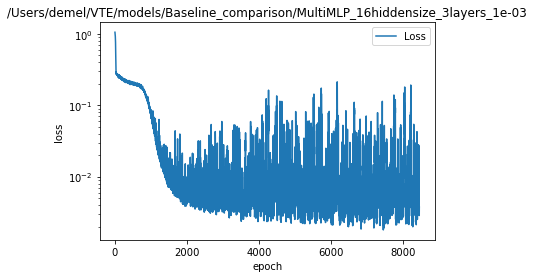

odels/Baseline_comparison/MultiMLP_16hiddensize_3layers_1e-03
Train accuracy = 0.9189, Test accuracy = 0.7966
VTE Train AUC = 1.0000, Test AUC = 0.7300
Death Train AUC = 0.4939, Test AUC = 0.3911
Epoch: 0, Loss: 1.1173e+00
Epoch: 100, Loss: 2.3633e-01
Epoch: 200, Loss: 2.2375e-01
Epoch: 300, Loss: 2.0378e-01
Epoch: 400, Loss: 2.0312e-01
Epoch: 500, Loss: 1.9530e-01
Epoch: 600, Loss: 2.0291e-01
Epoch: 700, Loss: 1.8966e-01
Epoch: 800, Loss: 1.9535e-01
Epoch: 900, Loss: 1.9228e-01
Epoch: 1000, Loss: 1.8799e-01
Epoch: 1100, Loss: 1.7867e-01
Epoch: 1200, Loss: 1.7170e-01
Epoch: 1300, Loss: 1.6700e-01
Epoch: 1400, Loss: 1.5197e-01
Epoch: 1500, Loss: 1.4357e-01
Epoch: 1600, Loss: 1.4724e-01
Epoch: 1700, Loss: 1.3852e-01
Epoch: 1800, Loss: 1.2696e-01
Epoch: 1900, Loss: 1.2673e-01
Epoch: 2000, Loss: 1.1979e-01
Epoch: 2100, Loss: 1.1149e-01
Epoch: 2200, Loss: 1.1017e-01
Epoch: 2300, Loss: 1.0444e-01
Epoch: 2400, Loss: 1.0310e-01
Epoch: 2500, Loss: 9.5562e-02
Epoch: 2600, Loss: 1.0106e-01
Epoch:

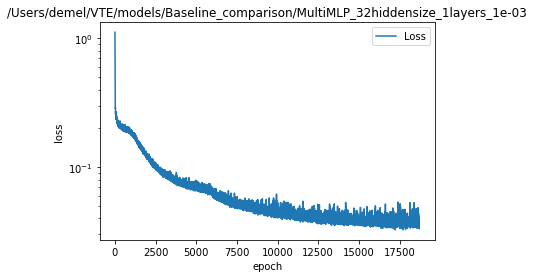

odels/Baseline_comparison/MultiMLP_32hiddensize_1layers_1e-03
Train accuracy = 0.9159, Test accuracy = 0.8254
VTE Train AUC = 0.9997, Test AUC = 0.7784
Death Train AUC = 0.5016, Test AUC = 0.3871
Epoch: 0, Loss: 1.1167e+00
Epoch: 100, Loss: 2.4395e-01
Epoch: 200, Loss: 2.0941e-01
Epoch: 300, Loss: 1.9285e-01
Epoch: 400, Loss: 1.9981e-01
Epoch: 500, Loss: 1.8216e-01
Epoch: 600, Loss: 1.8751e-01
Epoch: 700, Loss: 1.7567e-01
Epoch: 800, Loss: 1.7386e-01
Epoch: 900, Loss: 1.6673e-01
Epoch: 1000, Loss: 1.5257e-01
Epoch: 1100, Loss: 1.4955e-01
Epoch: 1200, Loss: 1.4493e-01
Epoch: 1300, Loss: 1.3716e-01
Epoch: 1400, Loss: 1.2552e-01
Epoch: 1500, Loss: 1.1664e-01
Epoch: 1600, Loss: 1.0585e-01
Epoch: 1700, Loss: 1.0144e-01
Epoch: 1800, Loss: 9.2102e-02
Epoch: 1900, Loss: 8.8910e-02
Epoch: 2000, Loss: 8.9724e-02
Epoch: 2100, Loss: 8.5137e-02
Epoch: 2200, Loss: 6.7629e-02
Epoch: 2300, Loss: 1.3334e-01
Epoch: 2400, Loss: 7.4589e-02
Epoch: 2500, Loss: 6.4644e-02
Epoch: 2600, Loss: 8.3242e-02
Epoch:

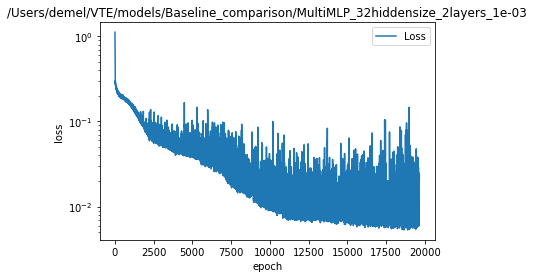

odels/Baseline_comparison/MultiMLP_32hiddensize_2layers_1e-03
Train accuracy = 0.9189, Test accuracy = 0.8119
VTE Train AUC = 1.0000, Test AUC = 0.7466
Death Train AUC = 0.4972, Test AUC = 0.4774
Epoch: 0, Loss: 1.0928e+00
Epoch: 100, Loss: 2.4717e-01
Epoch: 200, Loss: 2.2140e-01
Epoch: 300, Loss: 2.0995e-01
Epoch: 400, Loss: 2.0561e-01
Epoch: 500, Loss: 1.9037e-01
Epoch: 600, Loss: 1.6087e-01
Epoch: 700, Loss: 1.0194e-01
Epoch: 800, Loss: 5.9939e-02
Epoch: 900, Loss: 2.5476e-02
Epoch: 1000, Loss: 1.6674e-02
Epoch: 1100, Loss: 1.2453e-02
Epoch: 1200, Loss: 9.5524e-03
Epoch: 1300, Loss: 7.6417e-03
Epoch: 1400, Loss: 7.4059e-03
Epoch: 1500, Loss: 5.7865e-03
Epoch: 1600, Loss: 6.0943e-03
Epoch: 1700, Loss: 5.4886e-03
Epoch: 1800, Loss: 5.1299e-03
Epoch: 1900, Loss: 4.5600e-03
Epoch: 2000, Loss: 5.5304e-03
Epoch: 2100, Loss: 6.6884e-03
Epoch: 2200, Loss: 4.5458e-03
Epoch: 2300, Loss: 4.3571e-03
Epoch: 2400, Loss: 3.9422e-03
Epoch: 2500, Loss: 4.0652e-03
Epoch: 2600, Loss: 4.3773e-03
Epoch:

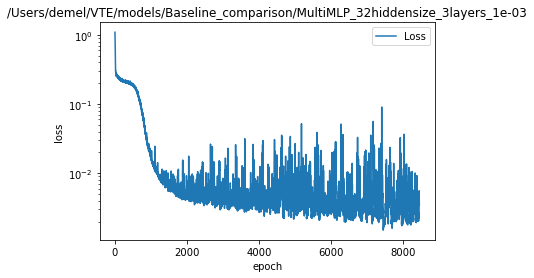

odels/Baseline_comparison/MultiMLP_32hiddensize_3layers_1e-03
Train accuracy = 0.9189, Test accuracy = 0.8085
VTE Train AUC = 1.0000, Test AUC = 0.7416
Death Train AUC = 0.5086, Test AUC = 0.5538
Epoch: 0, Loss: 9.4191e-01
Epoch: 100, Loss: 2.2749e-01
Epoch: 200, Loss: 2.1534e-01
Epoch: 300, Loss: 2.1001e-01
Epoch: 400, Loss: 1.9308e-01
Epoch: 500, Loss: 1.9108e-01
Epoch: 600, Loss: 1.9410e-01
Epoch: 700, Loss: 1.8441e-01
Epoch: 800, Loss: 1.7414e-01
Epoch: 900, Loss: 1.6830e-01
Epoch: 1000, Loss: 1.6026e-01
Epoch: 1100, Loss: 1.4572e-01
Epoch: 1200, Loss: 1.3330e-01
Epoch: 1300, Loss: 1.2512e-01
Epoch: 1400, Loss: 1.1486e-01
Epoch: 1500, Loss: 1.1117e-01
Epoch: 1600, Loss: 9.9610e-02
Epoch: 1700, Loss: 9.6764e-02
Epoch: 1800, Loss: 8.9399e-02
Epoch: 1900, Loss: 8.4975e-02
Epoch: 2000, Loss: 8.2721e-02
Epoch: 2100, Loss: 7.8035e-02
Epoch: 2200, Loss: 7.7896e-02
Epoch: 2300, Loss: 7.3645e-02
Epoch: 2400, Loss: 7.1203e-02
Epoch: 2500, Loss: 6.7920e-02
Epoch: 2600, Loss: 6.7576e-02
Epoch:

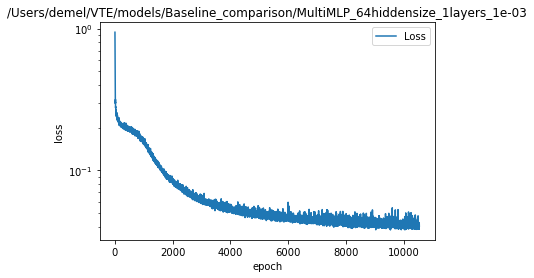

odels/Baseline_comparison/MultiMLP_64hiddensize_1layers_1e-03
Train accuracy = 0.9071, Test accuracy = 0.8390
VTE Train AUC = 0.9991, Test AUC = 0.7812
Death Train AUC = 0.4747, Test AUC = 0.4803
Epoch: 0, Loss: 1.1274e+00
Epoch: 100, Loss: 2.4623e-01
Epoch: 200, Loss: 2.2930e-01
Epoch: 300, Loss: 2.0659e-01
Epoch: 400, Loss: 2.0719e-01
Epoch: 500, Loss: 1.8743e-01
Epoch: 600, Loss: 1.8507e-01
Epoch: 700, Loss: 1.7919e-01
Epoch: 800, Loss: 1.8235e-01
Epoch: 900, Loss: 1.7508e-01
Epoch: 1000, Loss: 1.6300e-01
Epoch: 1100, Loss: 1.6318e-01
Epoch: 1200, Loss: 1.5073e-01
Epoch: 1300, Loss: 1.3956e-01
Epoch: 1400, Loss: 1.3211e-01
Epoch: 1500, Loss: 1.2698e-01
Epoch: 1600, Loss: 1.1969e-01
Epoch: 1700, Loss: 1.0896e-01
Epoch: 1800, Loss: 1.1079e-01
Epoch: 1900, Loss: 1.1037e-01
Epoch: 2000, Loss: 1.0863e-01
Epoch: 2100, Loss: 1.0271e-01
Epoch: 2200, Loss: 1.0759e-01
Epoch: 2300, Loss: 1.0350e-01
Epoch: 2400, Loss: 9.9554e-02
Epoch: 2500, Loss: 1.0957e-01
Epoch: 2600, Loss: 1.2230e-01
Epoch:

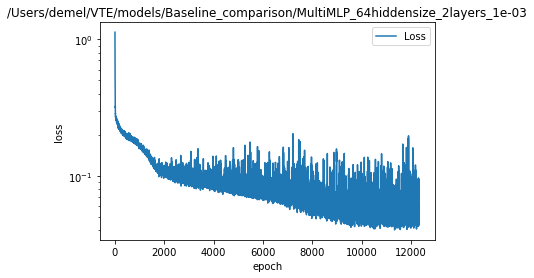

odels/Baseline_comparison/MultiMLP_64hiddensize_2layers_1e-03
Train accuracy = 0.9056, Test accuracy = 0.7831
VTE Train AUC = 0.9963, Test AUC = 0.7294
Death Train AUC = 0.4838, Test AUC = 0.4257
Epoch: 0, Loss: 1.0691e+00
Epoch: 100, Loss: 2.5269e-01
Epoch: 200, Loss: 2.2391e-01
Epoch: 300, Loss: 2.1678e-01
Epoch: 400, Loss: 2.0515e-01
Epoch: 500, Loss: 2.0276e-01
Epoch: 600, Loss: 1.8188e-01
Epoch: 700, Loss: 1.5437e-01
Epoch: 800, Loss: 1.0671e-01
Epoch: 900, Loss: 7.4032e-02
Epoch: 1000, Loss: 6.6408e-02
Epoch: 1100, Loss: 4.1337e-02
Epoch: 1200, Loss: 2.9419e-02
Epoch: 1300, Loss: 1.1308e-02
Epoch: 1400, Loss: 1.2041e-02
Epoch: 1500, Loss: 6.7000e-03
Epoch: 1600, Loss: 5.8690e-03
Epoch: 1700, Loss: 5.2112e-03
Epoch: 1800, Loss: 1.0040e-02
Epoch: 1900, Loss: 8.9626e-03
Epoch: 2000, Loss: 8.3528e-03
Epoch: 2100, Loss: 5.7234e-03
Epoch: 2200, Loss: 6.2470e-03
Epoch: 2300, Loss: 7.2610e-03
Epoch: 2400, Loss: 3.8916e-03
Epoch: 2500, Loss: 6.1803e-03
Epoch: 2600, Loss: 4.6670e-03
Epoch:

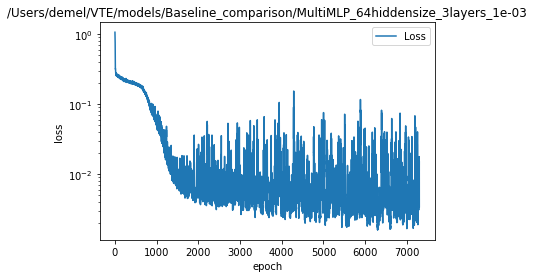

odels/Baseline_comparison/MultiMLP_64hiddensize_3layers_1e-03
Train accuracy = 0.9189, Test accuracy = 0.7763
VTE Train AUC = 1.0000, Test AUC = 0.7074
Death Train AUC = 0.5084, Test AUC = 0.4971
Epoch: 0, Loss: 7.8868e-01
Epoch: 100, Loss: 2.2749e-01
Epoch: 200, Loss: 2.0845e-01
Epoch: 300, Loss: 2.0727e-01
Epoch: 400, Loss: 1.9107e-01
Epoch: 500, Loss: 1.9490e-01
Epoch: 600, Loss: 1.7393e-01
Epoch: 700, Loss: 1.8054e-01
Epoch: 800, Loss: 1.7672e-01
Epoch: 900, Loss: 1.6351e-01
Epoch: 1000, Loss: 1.6291e-01
Epoch: 1100, Loss: 1.5393e-01
Epoch: 1200, Loss: 1.4885e-01
Epoch: 1300, Loss: 1.4222e-01
Epoch: 1400, Loss: 1.4234e-01
Epoch: 1500, Loss: 1.3777e-01
Epoch: 1600, Loss: 1.2737e-01
Epoch: 1700, Loss: 1.3427e-01
Epoch: 1800, Loss: 1.2368e-01
Epoch: 1900, Loss: 1.2402e-01
Epoch: 2000, Loss: 1.1960e-01
Epoch: 2100, Loss: 1.1444e-01
Epoch: 2200, Loss: 1.1381e-01
Epoch: 2300, Loss: 1.1283e-01
Epoch: 2400, Loss: 1.0732e-01
Epoch: 2500, Loss: 1.0636e-01
Epoch: 2600, Loss: 1.0714e-01
Epoch:

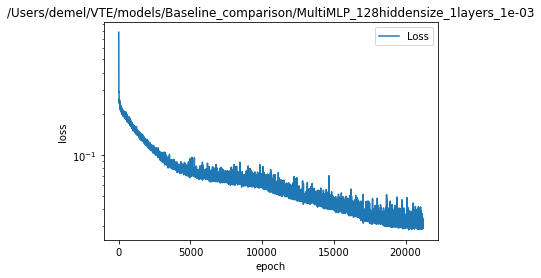

odels/Baseline_comparison/MultiMLP_128hiddensize_1layers_1e-03
Train accuracy = 0.9071, Test accuracy = 0.8407
VTE Train AUC = 0.9999, Test AUC = 0.7205
Death Train AUC = 0.4754, Test AUC = 0.4341
Epoch: 0, Loss: 1.0825e+00
Epoch: 100, Loss: 2.4128e-01
Epoch: 200, Loss: 2.2767e-01
Epoch: 300, Loss: 2.1077e-01
Epoch: 400, Loss: 2.0483e-01
Epoch: 500, Loss: 2.0418e-01
Epoch: 600, Loss: 1.9788e-01
Epoch: 700, Loss: 1.9143e-01
Epoch: 800, Loss: 1.9270e-01
Epoch: 900, Loss: 1.9901e-01
Epoch: 1000, Loss: 1.9622e-01
Epoch: 1100, Loss: 1.9592e-01
Epoch: 1200, Loss: 1.9557e-01
Epoch: 1300, Loss: 1.9615e-01
Epoch: 1400, Loss: 1.9063e-01
Epoch: 1500, Loss: 1.8977e-01
Epoch: 1600, Loss: 1.8815e-01
Epoch: 1700, Loss: 1.8128e-01
Epoch: 1800, Loss: 1.9375e-01
Epoch: 1900, Loss: 1.8164e-01
Epoch: 2000, Loss: 1.8575e-01
Epoch: 2100, Loss: 1.8584e-01
Epoch: 2200, Loss: 1.8989e-01
Epoch: 2300, Loss: 1.8706e-01
Epoch: 2400, Loss: 1.8388e-01
Epoch: 2500, Loss: 1.9166e-01
Epoch: 2600, Loss: 1.8313e-01
Epoch

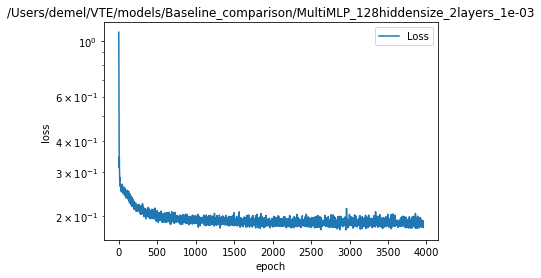

odels/Baseline_comparison/MultiMLP_128hiddensize_2layers_1e-03
Train accuracy = 0.8555, Test accuracy = 0.8542
VTE Train AUC = 0.8756, Test AUC = 0.8130
Death Train AUC = 0.5427, Test AUC = 0.4220
Epoch: 0, Loss: 1.0515e+00
Epoch: 100, Loss: 2.3170e-01
Epoch: 200, Loss: 2.1641e-01
Epoch: 300, Loss: 2.0917e-01
Epoch: 400, Loss: 1.9947e-01
Epoch: 500, Loss: 2.0575e-01
Epoch: 600, Loss: 2.0207e-01
Epoch: 700, Loss: 1.8323e-01
Epoch: 800, Loss: 1.5875e-01
Epoch: 900, Loss: 1.1329e-01
Epoch: 1000, Loss: 6.3903e-02
Epoch: 1100, Loss: 3.8399e-02
Epoch: 1200, Loss: 2.9343e-02
Epoch: 1300, Loss: 2.2595e-02
Epoch: 1400, Loss: 1.4788e-02
Epoch: 1500, Loss: 2.3797e-02
Epoch: 1600, Loss: 1.2104e-02
Epoch: 1700, Loss: 1.2424e-02
Epoch: 1800, Loss: 1.1192e-02
Epoch: 1900, Loss: 1.1200e-02
Epoch: 2000, Loss: 8.5012e-03
Epoch: 2100, Loss: 7.9489e-03
Epoch: 2200, Loss: 6.6797e-03
Epoch: 2300, Loss: 1.4516e-02
Epoch: 2400, Loss: 7.6620e-03
Epoch: 2500, Loss: 5.2870e-03
Epoch: 2600, Loss: 8.8447e-03
Epoch

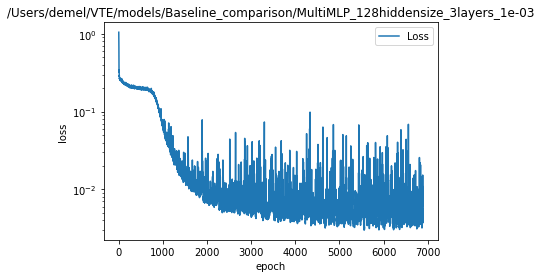

odels/Baseline_comparison/MultiMLP_128hiddensize_3layers_1e-03
Train accuracy = 0.9189, Test accuracy = 0.8000
VTE Train AUC = 1.0000, Test AUC = 0.7207
Death Train AUC = 0.5191, Test AUC = 0.5399
Epoch: 0, Loss: 9.5283e-01
Epoch: 100, Loss: 2.2616e-01
Epoch: 200, Loss: 2.1257e-01
Epoch: 300, Loss: 1.9933e-01
Epoch: 400, Loss: 1.9952e-01
Epoch: 500, Loss: 1.9608e-01
Epoch: 600, Loss: 1.9012e-01
Epoch: 700, Loss: 1.8899e-01
Epoch: 800, Loss: 1.7447e-01
Epoch: 900, Loss: 1.8388e-01
Epoch: 1000, Loss: 1.6230e-01
Epoch: 1100, Loss: 1.6429e-01
Epoch: 1200, Loss: 1.5157e-01
Epoch: 1300, Loss: 1.4497e-01
Epoch: 1400, Loss: 1.3881e-01
Epoch: 1500, Loss: 1.2378e-01
Epoch: 1600, Loss: 1.2377e-01
Epoch: 1700, Loss: 1.0918e-01
Epoch: 1800, Loss: 9.8620e-02
Epoch: 1900, Loss: 9.3459e-02
Epoch: 2000, Loss: 8.8108e-02
Epoch: 2100, Loss: 8.6290e-02
Epoch: 2200, Loss: 7.9004e-02
Epoch: 2300, Loss: 7.4636e-02
Epoch: 2400, Loss: 7.0420e-02
Epoch: 2500, Loss: 6.3425e-02
Epoch: 2600, Loss: 6.3584e-02
Epoch

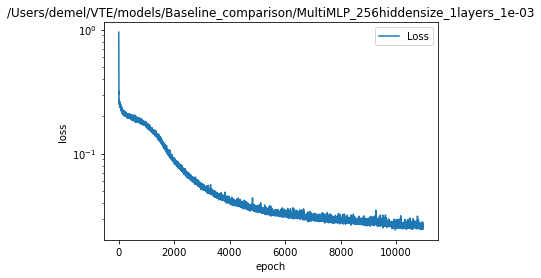

odels/Baseline_comparison/MultiMLP_256hiddensize_1layers_1e-03
Train accuracy = 0.9174, Test accuracy = 0.8237
VTE Train AUC = 1.0000, Test AUC = 0.7992
Death Train AUC = 0.4918, Test AUC = 0.4012
Epoch: 0, Loss: 1.0560e+00
Epoch: 100, Loss: 2.3750e-01
Epoch: 200, Loss: 2.2108e-01
Epoch: 300, Loss: 2.1295e-01
Epoch: 400, Loss: 2.0965e-01
Epoch: 500, Loss: 2.0931e-01
Epoch: 600, Loss: 2.0307e-01
Epoch: 700, Loss: 1.9687e-01
Epoch: 800, Loss: 1.9008e-01
Epoch: 900, Loss: 2.0063e-01
Epoch: 1000, Loss: 1.9108e-01
Epoch: 1100, Loss: 1.9611e-01
Epoch: 1200, Loss: 1.9098e-01
Epoch: 1300, Loss: 1.9109e-01
Epoch: 1400, Loss: 1.9263e-01
Epoch: 1500, Loss: 1.8855e-01
Epoch: 1600, Loss: 1.9283e-01
Epoch: 1700, Loss: 1.9296e-01
Epoch: 1800, Loss: 1.8311e-01
Epoch: 1900, Loss: 1.8257e-01
Epoch: 2000, Loss: 1.8366e-01
Epoch: 2100, Loss: 1.9133e-01
Epoch: 2200, Loss: 1.9279e-01
Epoch: 2300, Loss: 1.9402e-01
Epoch: 2400, Loss: 1.9185e-01
Epoch: 2500, Loss: 1.9338e-01


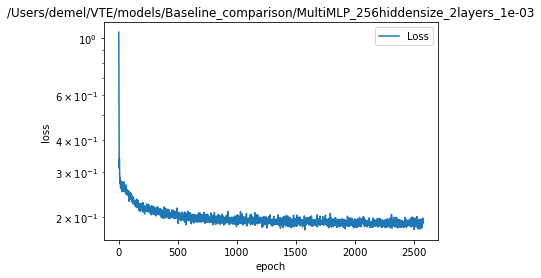

odels/Baseline_comparison/MultiMLP_256hiddensize_2layers_1e-03
Train accuracy = 0.8569, Test accuracy = 0.8542
VTE Train AUC = 0.8695, Test AUC = 0.8080
Death Train AUC = 0.5567, Test AUC = 0.4364
Epoch: 0, Loss: 1.0132e+00
Epoch: 100, Loss: 2.3806e-01
Epoch: 200, Loss: 2.2856e-01
Epoch: 300, Loss: 2.0802e-01
Epoch: 400, Loss: 2.0456e-01
Epoch: 500, Loss: 1.9910e-01
Epoch: 600, Loss: 1.8531e-01
Epoch: 700, Loss: 1.8286e-01
Epoch: 800, Loss: 1.7059e-01
Epoch: 900, Loss: 1.5012e-01
Epoch: 1000, Loss: 1.1265e-01
Epoch: 1100, Loss: 7.5177e-02
Epoch: 1200, Loss: 4.1495e-02
Epoch: 1300, Loss: 3.2132e-02
Epoch: 1400, Loss: 2.1460e-02
Epoch: 1500, Loss: 1.4022e-02
Epoch: 1600, Loss: 1.1011e-02
Epoch: 1700, Loss: 9.0555e-03
Epoch: 1800, Loss: 8.8634e-03
Epoch: 1900, Loss: 9.2085e-03
Epoch: 2000, Loss: 8.9336e-03
Epoch: 2100, Loss: 7.2282e-03
Epoch: 2200, Loss: 6.0060e-03
Epoch: 2300, Loss: 5.8581e-03
Epoch: 2400, Loss: 7.6689e-03
Epoch: 2500, Loss: 5.4387e-03
Epoch: 2600, Loss: 6.2259e-03
Epoch

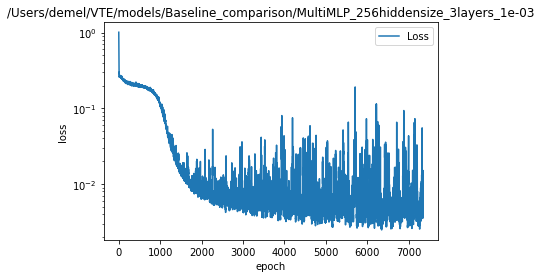

odels/Baseline_comparison/MultiMLP_256hiddensize_3layers_1e-03
Train accuracy = 0.9189, Test accuracy = 0.8068
VTE Train AUC = 1.0000, Test AUC = 0.7436
Death Train AUC = 0.4930, Test AUC = 0.4568


In [55]:
criterion = nn.CrossEntropyLoss()

for weight_decay in [1e-3]:
    for hidden_size in [16, 32, 64, 128, 256]:
        for num_layer in [1, 2, 3]:
            
            path = 'C:/Users/demel/VTE/models/Baseline_comparison/MultiMLP_{}hiddensize_{}layers_{:.0e}'.format(hidden_size, num_layer, weight_decay)
            #if os.path.isfile(path):
            #    continue

            model = multiMLP(input_size=total_train.shape[-1], hidden_size=hidden_size, num_layer=num_layer, num_event=num_event).to(device)
            #if os.path.isfile(path):
            #    model.load_state_dict(torch.load(path, map_location = device))

            lr = 1e-3
            optimizer = adabound.AdaBound(model.parameters(), lr=lr, weight_decay=0)

            loss_array = []
            patience = 0
            min_loss = np.inf
            for e in range(int(1e6)):

                loss_array_tmp = []

                for total_batch, timevar_compact_batch, event_batch, time_batch, obs_mask_batch in train_loader:

                    total_batch = total_batch.float()
                    event_batch = event_batch.long()

                    y_pred = model(total_batch.to(device))

                    norm = 0.
                    for parameter in model.parameters():
                        norm += torch.norm(parameter, p=1)

                    loss1 = criterion(y_pred, event_batch.to(device))

                    loss = loss1 + weight_decay*norm
                    loss_array_tmp.append(loss1.item())

                    model.zero_grad()

                    loss.backward()

                    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.)
                    optimizer.step()

                loss_array.append(np.mean(loss_array_tmp))
                if e % 100 == 0:
                    print('Epoch: ' + str(e) + 
                          ', Loss: '+ f'{loss_array[-1]:.4e}')
                if min_loss > loss_array[-1]:
                    patience = 0
                    min_loss = loss_array[-1]
                    torch.save(model.state_dict(), path)
                else:
                    patience += 1

                torch.cuda.empty_cache()

                if patience > 1000:
                    break

            plt.plot(loss_array, label='Loss')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.yscale('log')
            plt.title(path[2:])
            plt.legend()
            plt.show()

            total_train_sort = torch.FloatTensor(total_train)
            total_test_sort = torch.FloatTensor(total_test)

            model.load_state_dict(torch.load(path, map_location = device))

            y_train = torch.softmax(model(total_train_sort.to(device)), 1).detach().cpu().numpy()
            y_test = torch.softmax(model(total_test_sort.to(device)), 1).detach().cpu().numpy()

            out_pred = np.where(y_train >= 0.5, 1, 0)
            acc_train = accuracy_score(event_train, out_pred.argmax(1))
            auc_train_vte = roc_auc_score(event_train == 1, y_train[:,1])
            auc_train_death = roc_auc_score(event_train == 2, y_train[:,2])
            
            out_pred = np.where(y_test >= 0.5, 1, 0)
            acc_test = accuracy_score(event_test, out_pred.argmax(1))
            auc_test_vte = roc_auc_score(event_test == 1, y_test[:,1])
            auc_test_death = roc_auc_score(event_test == 2, y_test[:,2])
            
            print(path[20:])
            print('Train accuracy = {:.4f}, Test accuracy = {:.4f}'.format(acc_train, acc_test))
            print('VTE Train AUC = {:.4f}, Test AUC = {:.4f}'.format(auc_train_vte, auc_test_vte))
            print('Death Train AUC = {:.4f}, Test AUC = {:.4f}'.format(auc_train_death, auc_test_death))
            
                   

### 2.2.2. DeepHit

In [56]:
def f_get_fc_mask1(meas_time, num_Event, num_Category):
    '''
        mask3 is required to get the contional probability (to calculate the denominator part)
        mask3 size is [N, num_Event, num_Category]. 1's until the last measurement time
    '''
    mask = torch.zeros(np.shape(meas_time)[0], num_Event, num_Category) # for denominator
    for i in range(np.shape(meas_time)[0]):
        mask[i, :, :int(meas_time[i, 0]+1)] = 1 # last measurement time

    return mask


def f_get_fc_mask2(time, label, num_Event, num_Category):
    '''
        mask4 is required to get the log-likelihood loss 
        mask4 size is [N, num_Event, num_Category]
            if not censored : one element = 1 (0 elsewhere)
            if censored     : fill elements with 1 after the censoring time (for all events)
    '''
    mask = torch.zeros(np.shape(time)[0], num_Event, num_Category) # for the first loss function
    for i in range(np.shape(time)[0]):
        if label[i,0] != 0:  #not censored
            mask[i,int(label[i,0]-1),int(time[i,0])] = 1
        else: #label[i,2]==0: censored
            mask[i,:,int(time[i,0]+1):] =  1 #fill 1 until from the censoring time (to get 1 - \sum F)
    return mask


def f_get_fc_mask3(time, meas_time, num_Category):
    '''
        mask5 is required calculate the ranking loss (for pair-wise comparision)
        mask5 size is [N, num_Category]. 
        - For longitudinal measurements:
             1's from the last measurement to the event time (exclusive and inclusive, respectively)
             denom is not needed since comparing is done over the same denom
        - For single measurement:
             1's from start to the event time(inclusive)
    '''
    mask = torch.zeros(np.shape(time)[0], num_Category) # for the first loss function
    if np.shape(meas_time):  #lonogitudinal measurements 
        for i in range(np.shape(time)[0]):
            t1 = int(meas_time[i, 0]) # last measurement time
            t2 = int(time[i, 0]) # censoring/event time
            mask[i,(t1+1):(t2+1)] = 1  #this excludes the last measurement time and includes the event time
    else:                    #single measurement
        for i in range(np.shape(time)[0]):
            t = int(time[i, 0]) # censoring/event time
            mask[i,:(t+1)] = 1  #this excludes the last measurement time and includes the event time
    return mask

In [57]:
def custom_loss(pmf, event, time, mask1, mask2, mask3, eps=1.e-9, alpha=0.1, num_event=2):
    
    ## maks 1 [-1, 2, ntime+2]은
    ## Event 발생 유무에 상관없이 처음부터 마지막관측까지 1, 나머지 0
    
    ## mask 2 [-1, 2, ntime+2]는
    ## Event 발생 시 해당 발생 달에만 1, 나머지는 0
    ## Censoring 시 Censoring된 달 이후 모두 1
    
    ## mask 3 [-1, ntime+2]은
    ## Event 발생 유무에 상관없이 마지막관측 이후부터 발생 및 Censoring 달까지 1, 나머지 0
    
    ## loss 1
    I_1 = torch.sign(event)
    
    denom = 1 - torch.sum(torch.sum(mask1 * pmf, dim=2), dim=1, keepdims=True)
    denom.clamp_(eps, 1-eps)

    logpdf = I_1 * torch.log(torch.sum(torch.sum(mask2 * pmf, dim=2), dim=1, keepdims=True) / denom + eps)
    logsurv = (1. - I_1) * torch.log(torch.sum(torch.sum(mask2 * pmf, dim=2), dim=1, keepdims=True) / denom + eps)

    loss_1 = - torch.mean(logpdf + 1.0*logsurv)

    ## loss 2
    sigma1 = 0.1

    eta = []
    mask3s = torch.stack(num_event * [mask3], 1)
    for e in range(num_event):
        one_vector = torch.ones_like(event)
        I_2 = (event == e+1).float()
        I_2 = torch.diag(torch.squeeze(I_2))
        
        R = torch.matmul(pmf[:,e,:], torch.t(mask3s[:,e,:]))
        ## R_{ij} = risk of i-th pat based on j-th time-condition (last meas. time ~ event time) , i.e. R_i(T_{j})

        diag_R = torch.reshape(torch.diag(R), [-1, 1])
        R = torch.matmul(one_vector, torch.t(diag_R)) - R
        R = torch.t(R)

        T = torch.relu(torch.sign(torch.matmul(one_vector, torch.t(time)) - torch.matmul(time, torch.t(one_vector))))
        ## T_{ij}=1 if t_i < t_j  and T_{ij}=0 if t_i >= t_j

        T = torch.matmul(I_2, T)

        tmp_eta = torch.mean(T * torch.exp(-R/sigma1), dim=1, keepdims=True)

        eta.append(tmp_eta)

    eta = torch.stack(eta, dim=1)
    eta = torch.mean(torch.reshape(eta, [-1, num_event]), dim=1, keepdims=True)

    loss_2 = torch.sum(eta)

    return loss_1, alpha * loss_2

In [58]:
class deephitCR(nn.Module):
    
    def __init__(self, input_size, ntime, shared_size=128, cs_size=128, num_event=2):
        super(deephitCR, self).__init__()
        
        self.input_size = input_size
        self.ntime = ntime
        
        self.shared_size = shared_size
        self.cs_size = cs_size
        self.num_event = num_event
        
        self.shared = nn.Sequential(
            nn.Linear(self.input_size, self.shared_size),
            nn.LeakyReLU(inplace=True)
        )
        self.cs1 = nn.Sequential(
            nn.Linear(self.shared_size + self.input_size, self.cs_size),
            nn.LeakyReLU(inplace=True),
            nn.Linear(self.cs_size, self.ntime+2)
        )
        self.cs2 = nn.Sequential(
            nn.Linear(self.shared_size + self.input_size, self.cs_size),
            nn.LeakyReLU(inplace=True),
            nn.Linear(self.cs_size, self.ntime+2)
        )
                
    def forward(self, x0):
        ## x: (batch, input_size)

        batch_size = x0.shape[0]
        
        ## SHARED NET
        
        x = self.shared(x0)
        
        ## CAUSE-SPECIFIC NET
        
        x1 = self.cs1(torch.cat([x, x0], 1))
        x2 = self.cs2(torch.cat([x, x0], 1))
        x = torch.cat([x1, x2], 1)
        
        return torch.softmax(x, 1)

In [ ]:
print(num_event)

Epoch: 0, TotalLoss: 1.1753e+00, Loss1: 4.0018e-01, Loss2: 7.7510e-01
Epoch: 100, TotalLoss: -4.8962e-02, Loss1: -2.0541e-01, Loss2: 1.5644e-01
Epoch: 200, TotalLoss: -5.3634e-02, Loss1: -2.0195e-01, Loss2: 1.4832e-01
Epoch: 300, TotalLoss: -6.8257e-02, Loss1: -2.1346e-01, Loss2: 1.4520e-01
Epoch: 400, TotalLoss: -5.9686e-02, Loss1: -2.0263e-01, Loss2: 1.4295e-01
Epoch: 500, TotalLoss: -1.1507e-01, Loss1: -2.5867e-01, Loss2: 1.4360e-01
Epoch: 600, TotalLoss: -1.0807e-01, Loss1: -2.5185e-01, Loss2: 1.4378e-01
Epoch: 700, TotalLoss: -6.2447e-02, Loss1: -2.0514e-01, Loss2: 1.4269e-01
Epoch: 800, TotalLoss: -1.0516e-01, Loss1: -2.4812e-01, Loss2: 1.4296e-01
Epoch: 900, TotalLoss: -7.4934e-02, Loss1: -2.1839e-01, Loss2: 1.4346e-01
Epoch: 1000, TotalLoss: -6.5384e-02, Loss1: -2.0793e-01, Loss2: 1.4254e-01
Epoch: 1100, TotalLoss: -9.5197e-02, Loss1: -2.3840e-01, Loss2: 1.4320e-01
Epoch: 1200, TotalLoss: -8.0318e-02, Loss1: -2.2171e-01, Loss2: 1.4139e-01
Epoch: 1300, TotalLoss: -9.0875e-02, Lo

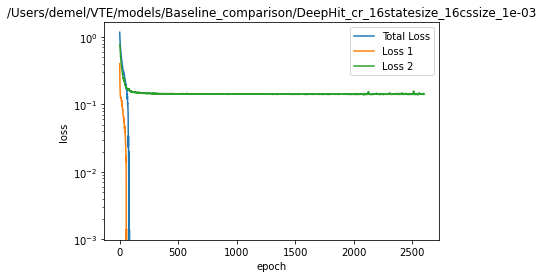

odels/Baseline_comparison/DeepHit_cr_16statesize_16cssize_1e-03
****************************************
Delta t = 1
****************************************
test ctd for CVD: 0.4283
test ctd for Death: 0.4783

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 3
****************************************
test ctd for CVD: 0.4283
test ctd for Death: 0.4783

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 6
****************************************
test ctd for CVD: 0.4283
test ctd for Death: 0.4783

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 9
****************************************
test ctd for CVD: 0.4283
test ctd for Death: 0.4783

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 12
****************************************
test ctd for CVD: 0.4283


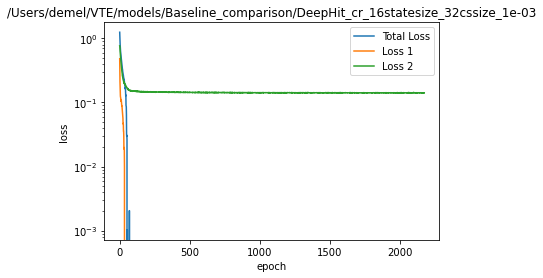

odels/Baseline_comparison/DeepHit_cr_16statesize_32cssize_1e-03
****************************************
Delta t = 1
****************************************
test ctd for CVD: 0.4280
test ctd for Death: 0.4766

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 3
****************************************
test ctd for CVD: 0.4280
test ctd for Death: 0.4766

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 6
****************************************
test ctd for CVD: 0.4280
test ctd for Death: 0.4766

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 9
****************************************
test ctd for CVD: 0.4280
test ctd for Death: 0.4766

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 12
****************************************
test ctd for CVD: 0.4280


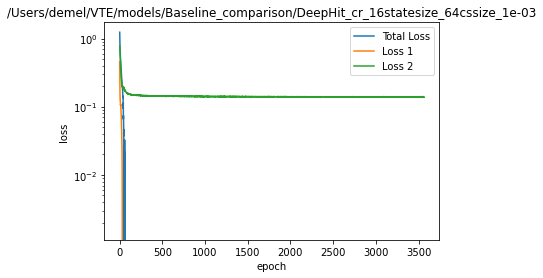

odels/Baseline_comparison/DeepHit_cr_16statesize_64cssize_1e-03
****************************************
Delta t = 1
****************************************
test ctd for CVD: 0.4273
test ctd for Death: 0.4771

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 3
****************************************
test ctd for CVD: 0.4273
test ctd for Death: 0.4771

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 6
****************************************
test ctd for CVD: 0.4273
test ctd for Death: 0.4771

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 9
****************************************
test ctd for CVD: 0.4273
test ctd for Death: 0.4771

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 12
****************************************
test ctd for CVD: 0.4273


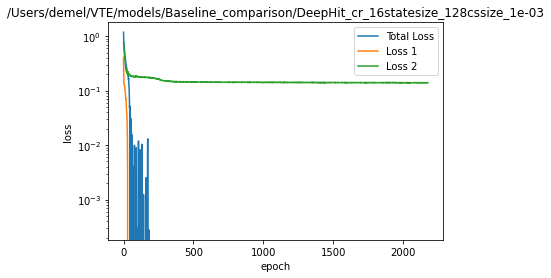

odels/Baseline_comparison/DeepHit_cr_16statesize_128cssize_1e-03
****************************************
Delta t = 1
****************************************
test ctd for CVD: 0.4283
test ctd for Death: 0.4793

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 3
****************************************
test ctd for CVD: 0.4283
test ctd for Death: 0.4793

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 6
****************************************
test ctd for CVD: 0.4283
test ctd for Death: 0.4793

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 9
****************************************
test ctd for CVD: 0.4283
test ctd for Death: 0.4793

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 12
****************************************
test ctd for CVD: 0.4283

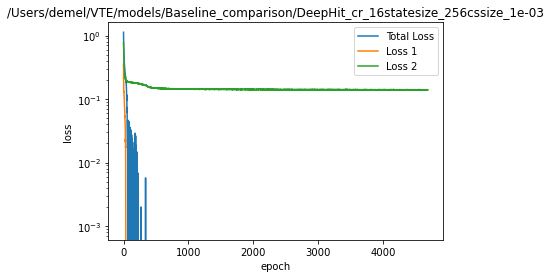

odels/Baseline_comparison/DeepHit_cr_16statesize_256cssize_1e-03
****************************************
Delta t = 1
****************************************
test ctd for CVD: 0.4274
test ctd for Death: 0.4763

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 3
****************************************
test ctd for CVD: 0.4274
test ctd for Death: 0.4763

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 6
****************************************
test ctd for CVD: 0.4274
test ctd for Death: 0.4763

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 9
****************************************
test ctd for CVD: 0.4274
test ctd for Death: 0.4763

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 12
****************************************
test ctd for CVD: 0.4274

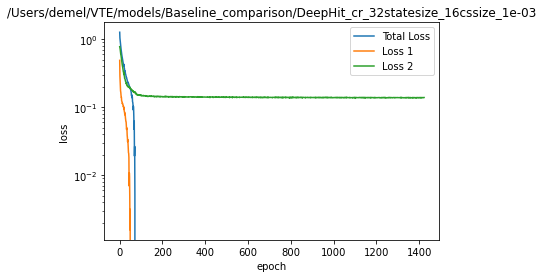

odels/Baseline_comparison/DeepHit_cr_32statesize_16cssize_1e-03
****************************************
Delta t = 1
****************************************
test ctd for CVD: 0.4276
test ctd for Death: 0.4776

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 3
****************************************
test ctd for CVD: 0.4276
test ctd for Death: 0.4776

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 6
****************************************
test ctd for CVD: 0.4276
test ctd for Death: 0.4776

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 9
****************************************
test ctd for CVD: 0.4276
test ctd for Death: 0.4776

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 12
****************************************
test ctd for CVD: 0.4276


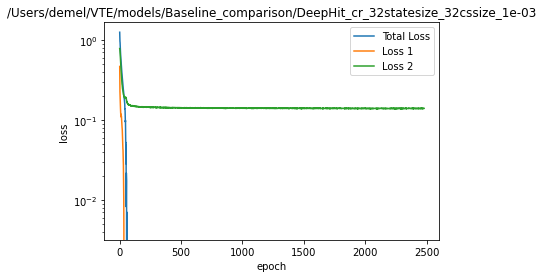

odels/Baseline_comparison/DeepHit_cr_32statesize_32cssize_1e-03
****************************************
Delta t = 1
****************************************
test ctd for CVD: 0.4277
test ctd for Death: 0.4769

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 3
****************************************
test ctd for CVD: 0.4277
test ctd for Death: 0.4769

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 6
****************************************
test ctd for CVD: 0.4277
test ctd for Death: 0.4769

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 9
****************************************
test ctd for CVD: 0.4277
test ctd for Death: 0.4769

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 12
****************************************
test ctd for CVD: 0.4277


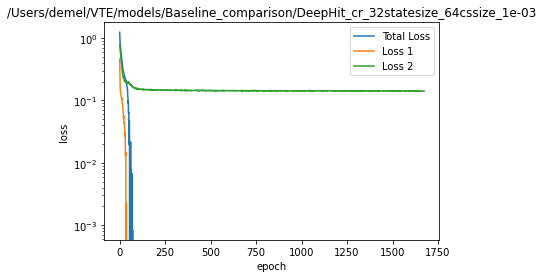

odels/Baseline_comparison/DeepHit_cr_32statesize_64cssize_1e-03
****************************************
Delta t = 1
****************************************
test ctd for CVD: 0.4279
test ctd for Death: 0.4767

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 3
****************************************
test ctd for CVD: 0.4279
test ctd for Death: 0.4767

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 6
****************************************
test ctd for CVD: 0.4279
test ctd for Death: 0.4767

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 9
****************************************
test ctd for CVD: 0.4279
test ctd for Death: 0.4767

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 12
****************************************
test ctd for CVD: 0.4279


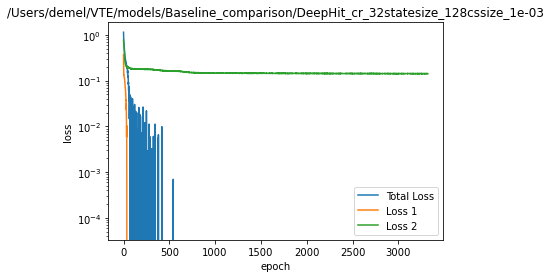

odels/Baseline_comparison/DeepHit_cr_32statesize_128cssize_1e-03
****************************************
Delta t = 1
****************************************
test ctd for CVD: 0.4277
test ctd for Death: 0.4774

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 3
****************************************
test ctd for CVD: 0.4277
test ctd for Death: 0.4774

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 6
****************************************
test ctd for CVD: 0.4277
test ctd for Death: 0.4774

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 9
****************************************
test ctd for CVD: 0.4277
test ctd for Death: 0.4774

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 12
****************************************
test ctd for CVD: 0.4277

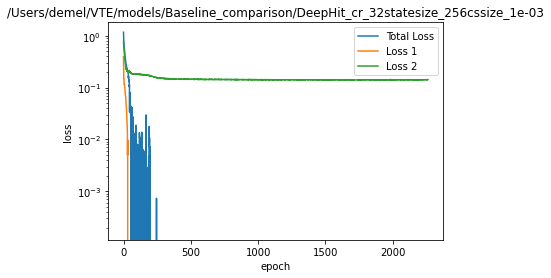

odels/Baseline_comparison/DeepHit_cr_32statesize_256cssize_1e-03
****************************************
Delta t = 1
****************************************
test ctd for CVD: 0.4284
test ctd for Death: 0.4769

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 3
****************************************
test ctd for CVD: 0.4284
test ctd for Death: 0.4769

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 6
****************************************
test ctd for CVD: 0.4284
test ctd for Death: 0.4769

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 9
****************************************
test ctd for CVD: 0.4284
test ctd for Death: 0.4769

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 12
****************************************
test ctd for CVD: 0.4284

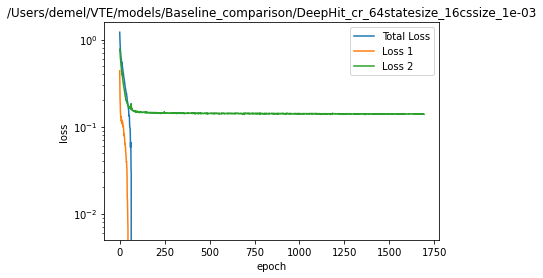

odels/Baseline_comparison/DeepHit_cr_64statesize_16cssize_1e-03
****************************************
Delta t = 1
****************************************
test ctd for CVD: 0.4290
test ctd for Death: 0.4788

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 3
****************************************
test ctd for CVD: 0.4290
test ctd for Death: 0.4788

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 6
****************************************
test ctd for CVD: 0.4290
test ctd for Death: 0.4788

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 9
****************************************
test ctd for CVD: 0.4290
test ctd for Death: 0.4788

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 12
****************************************
test ctd for CVD: 0.4290


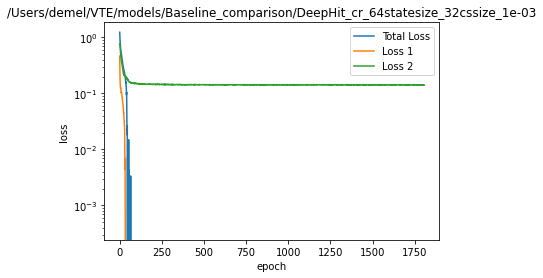

odels/Baseline_comparison/DeepHit_cr_64statesize_32cssize_1e-03
****************************************
Delta t = 1
****************************************
test ctd for CVD: 0.4275
test ctd for Death: 0.4769

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 3
****************************************
test ctd for CVD: 0.4275
test ctd for Death: 0.4769

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 6
****************************************
test ctd for CVD: 0.4275
test ctd for Death: 0.4769

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 9
****************************************
test ctd for CVD: 0.4275
test ctd for Death: 0.4769

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 12
****************************************
test ctd for CVD: 0.4275


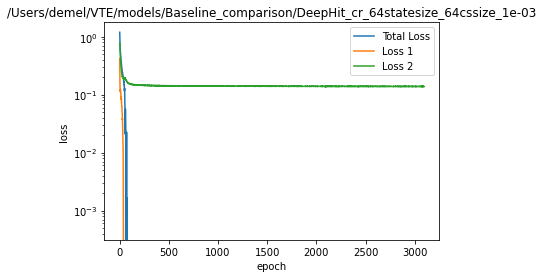

odels/Baseline_comparison/DeepHit_cr_64statesize_64cssize_1e-03
****************************************
Delta t = 1
****************************************
test ctd for CVD: 0.4285
test ctd for Death: 0.4781

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 3
****************************************
test ctd for CVD: 0.4285
test ctd for Death: 0.4781

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 6
****************************************
test ctd for CVD: 0.4285
test ctd for Death: 0.4781

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 9
****************************************
test ctd for CVD: 0.4285
test ctd for Death: 0.4781

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 12
****************************************
test ctd for CVD: 0.4285


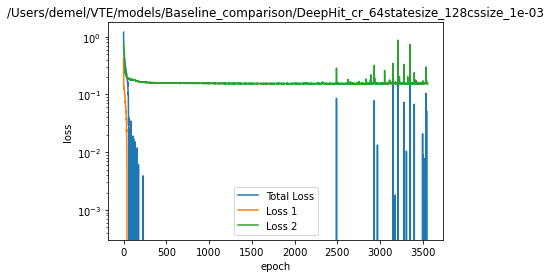

odels/Baseline_comparison/DeepHit_cr_64statesize_128cssize_1e-03
****************************************
Delta t = 1
****************************************
test ctd for CVD: 0.4368
test ctd for Death: 0.4831

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 3
****************************************
test ctd for CVD: 0.4368
test ctd for Death: 0.4831

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 6
****************************************
test ctd for CVD: 0.4368
test ctd for Death: 0.4831

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 9
****************************************
test ctd for CVD: 0.4368
test ctd for Death: 0.4831

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 12
****************************************
test ctd for CVD: 0.4368

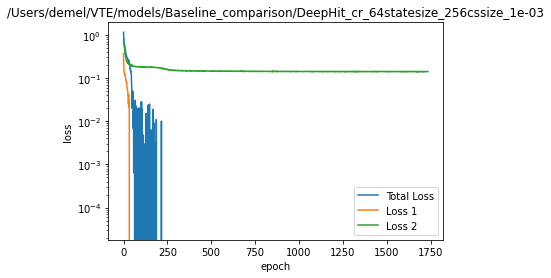

odels/Baseline_comparison/DeepHit_cr_64statesize_256cssize_1e-03
****************************************
Delta t = 1
****************************************
test ctd for CVD: 0.4273
test ctd for Death: 0.4769

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 3
****************************************
test ctd for CVD: 0.4273
test ctd for Death: 0.4769

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 6
****************************************
test ctd for CVD: 0.4273
test ctd for Death: 0.4769

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 9
****************************************
test ctd for CVD: 0.4273
test ctd for Death: 0.4769

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 12
****************************************
test ctd for CVD: 0.4273

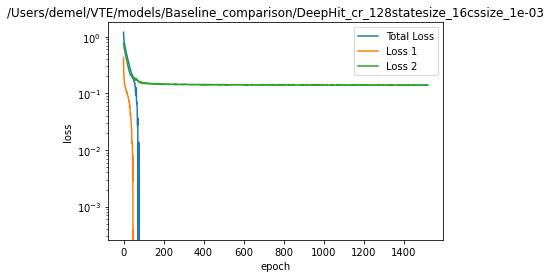

odels/Baseline_comparison/DeepHit_cr_128statesize_16cssize_1e-03
****************************************
Delta t = 1
****************************************
test ctd for CVD: 0.4278
test ctd for Death: 0.4776

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 3
****************************************
test ctd for CVD: 0.4278
test ctd for Death: 0.4776

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 6
****************************************
test ctd for CVD: 0.4278
test ctd for Death: 0.4776

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 9
****************************************
test ctd for CVD: 0.4278
test ctd for Death: 0.4776

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 12
****************************************
test ctd for CVD: 0.4278

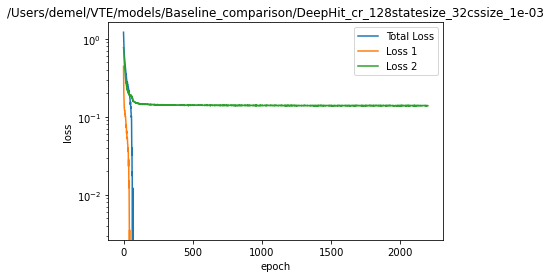

odels/Baseline_comparison/DeepHit_cr_128statesize_32cssize_1e-03
****************************************
Delta t = 1
****************************************
test ctd for CVD: 0.4272
test ctd for Death: 0.4767

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 3
****************************************
test ctd for CVD: 0.4272
test ctd for Death: 0.4767

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 6
****************************************
test ctd for CVD: 0.4272
test ctd for Death: 0.4767

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 9
****************************************
test ctd for CVD: 0.4272
test ctd for Death: 0.4767

test Brier for CVD: 0.0898
test Brier for Death: 0.0644

****************************************
Delta t = 12
****************************************
test ctd for CVD: 0.4272

KeyboardInterrupt: 

In [61]:
for weight_decay in [1e-3]:
    for shared_size in [16, 32, 64, 128, 256]:
        for cs_size in [16, 32, 64, 128, 256]:

            path = 'C:/Users/demel/VTE/models/Baseline_comparison/DeepHit_cr_{}statesize_{}cssize_{:.0e}'.format(shared_size, cs_size, weight_decay)
            #if os.path.isfile(path):
            #    continue

            model = deephitCR(input_size=total_train.shape[-1], ntime=ntime, shared_size=shared_size, cs_size=cs_size, num_event=num_event).to(device)
            #if os.path.isfile(path):
            #    model.load_state_dict(torch.load(path, map_location = device))

            lr = 1e-2
            optimizer = adabound.AdaBound(model.parameters(), lr=lr, weight_decay=0)

            loss_array = []
            loss_array1 = []
            loss_array2 = []
            patience = 0
            min_loss = np.inf
            for e in range(int(1e6)):

                loss1_array_tmp = []
                loss2_array_tmp = []

                for total_batch, timevar_compact_batch, event_batch, time_batch, obs_mask_batch in train_loader:

                    input_lengths_batch = ((timevar_compact_batch[:,:,-1] ).sum(1) + 1).int()

                    total_batch = total_batch.float()
                    event_batch = event_batch.float()
                    time_batch = time_batch.float()
                    obs_mask_batch = obs_mask_batch.float()

                    mask1_batch = f_get_fc_mask1(input_lengths_batch.reshape(-1, 1) - 1, num_Event=2, num_Category=ntime+2)
                    mask2_batch = f_get_fc_mask2(time_batch.reshape(-1, 1), event_batch.reshape(-1, 1), num_Event=2, num_Category=ntime+2)
                    mask3_batch = f_get_fc_mask3(time_batch.reshape(-1, 1), input_lengths_batch.reshape(-1, 1) - 1, ntime+2)

                    y_pred = model(total_batch.to(device))

                    norm = 0.
                    for parameter in model.parameters():
                        norm += torch.norm(parameter, p=1)

                    loss1, loss2 = custom_loss(pmf = y_pred.reshape(-1, num_event, ntime+2), 
                                               event = event_batch.reshape(-1, 1).to(device), 
                                               time = time_batch.reshape(-1, 1).to(device),
                                               mask1 = mask1_batch.to(device), 
                                               mask2 = mask2_batch.to(device), 
                                               mask3 = mask3_batch.to(device), 
                                               num_event = num_event)

                    loss = loss1 + loss2 + weight_decay*norm
                    loss1_array_tmp.append(loss1.item())
                    loss2_array_tmp.append(loss2.item())

                    model.zero_grad()

                    loss.backward()

                    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.)
                    optimizer.step()

                loss_array.append(np.mean(loss1_array_tmp) + np.mean(loss2_array_tmp))
                loss_array1.append(np.mean(loss1_array_tmp))
                loss_array2.append(np.mean(loss2_array_tmp))
                if e % 100 == 0:
                    print('Epoch: ' + str(e) + 
                          ', TotalLoss: '+ f'{loss_array[-1]:.4e}' +
                          ', Loss1: '+ f'{loss_array1[-1]:.4e}' + 
                          ', Loss2: '+ f'{loss_array2[-1]:.4e}')
                if min_loss > loss_array[-1]:
                    patience = 0
                    min_loss = loss_array[-1]
                    torch.save(model.state_dict(), path)
                else:
                    patience += 1

                torch.cuda.empty_cache()

                if patience > 1000:
                    break

            plt.plot(loss_array, label='Total Loss')
            plt.plot(loss_array1, label='Loss 1')
            plt.plot(loss_array2, label='Loss 2')
            plt.ylabel('loss')
            plt.xlabel('epoch')
            plt.yscale('log')
            plt.title(path[2:])
            plt.legend()
            plt.show()

            model.load_state_dict(torch.load(path, map_location = device))
            
            print(path[20:])
            
            for delt in [1,3,6,9,12]:

                print('****************************************')
                print('Delta t = {}'.format(delt))
                print('****************************************')

                input_lengths_train = torch.IntTensor((timevar_compact_train[:,:,-1] ).sum(1) + 1)

                total_train_sort = torch.FloatTensor(total_train)
                event_train_sort = torch.FloatTensor(event_train)
                time_train_sort = torch.FloatTensor(time_train)
                obs_mask_compact_train_sort = torch.FloatTensor(obs_mask_compact_train)

                input_lengths_test = torch.IntTensor((timevar_compact_test[:,:,-1] ).sum(1) + 1)

                total_test_sort = torch.FloatTensor(total_test)
                event_test_sort = torch.FloatTensor(event_test)
                time_test_sort = torch.FloatTensor(time_test)
                obs_mask_compact_test_sort = torch.FloatTensor(obs_mask_compact_test)

                y_train = model(total_train_sort.to(device))
                y_test = model(total_test_sort.to(device))

                mask1_train_sort = f_get_fc_mask1(input_lengths_train.reshape(-1, 1) - 1, num_Event=2, num_Category=ntime+2).to(device)
                mask1_test_sort = f_get_fc_mask1(input_lengths_test.reshape(-1, 1) - 1, num_Event=2, num_Category=ntime+2).to(device)

                CIF_train = torch.cumsum(y_train.reshape(-1,2,ntime+2) * (1-mask1_train_sort), 2)
                CIF_test = torch.cumsum(y_test.reshape(-1,2,ntime+2) * (1-mask1_test_sort), 2)

                #print('train ctd for CVD: {:.4f}'.format(concordance_td(time_train_sort.detach().cpu().numpy(), event_train_sort.detach().cpu().numpy()==1, 1.-CIF_train[:,0,:].detach().cpu().numpy().T, np.int32(time_train_sort.detach().cpu().numpy()-1))))
                #print('train ctd for Death: {:.4f}'.format(concordance_td(time_train_sort.detach().cpu().numpy(), event_train_sort.detach().cpu().numpy()==2, 1.-CIF_train[:,1,:].detach().cpu().numpy().T, np.int32(time_train_sort.detach().cpu().numpy()-1))))

                print('test ctd for CVD: {:.4f}'.format(concordance_td(time_test_sort.detach().cpu().numpy(), event_test_sort.detach().cpu().numpy()==1, 1.-CIF_test[:,0,:].detach().cpu().numpy().T, np.int32(time_test_sort.detach().cpu().numpy()-1))))
                print('test ctd for Death: {:.4f}'.format(concordance_td(time_test_sort.detach().cpu().numpy(), event_test_sort.detach().cpu().numpy()==2, 1.-CIF_test[:,1,:].detach().cpu().numpy().T, np.int32(time_test_sort.detach().cpu().numpy()-1))) + '\n')

                E_CVD_train = np.array([CIF_train[i,0,int(j)].item() for (i,j) in zip(range(len(time_train_sort)), time_train_sort.detach().cpu().numpy()-1)])
                O_CVD_train = event_train_sort.detach().cpu().numpy()==1
                E_Death_train = np.array([CIF_train[i,1,int(j)].item() for (i,j) in zip(range(len(time_train_sort)), time_train_sort.detach().cpu().numpy()-1)])
                O_Death_train = event_train_sort.detach().cpu().numpy()==2

                E_CVD_test = np.array([CIF_test[i,0,int(j)].item() for (i,j) in zip(range(len(time_test_sort)), time_test_sort.detach().cpu().numpy()-1)])
                O_CVD_test = event_test_sort.detach().cpu().numpy()==1
                E_Death_test = np.array([CIF_test[i,1,int(j)].item() for (i,j) in zip(range(len(time_test_sort)), time_test_sort.detach().cpu().numpy()-1)])
                O_Death_test = event_test_sort.detach().cpu().numpy()==2

                #print('train Brier for CVD: {:.4f}'.format(((E_CVD_train - O_CVD_train)**2).mean()))
                #print('train Brier for Death: {:.4f}'.format(((E_Death_train - O_Death_train)**2).mean()))

                print('test Brier for CVD: {:.4f}'.format(((E_CVD_test - O_CVD_test)**2).mean()))
                print('test Brier for Death: {:.4f}'.format(((E_Death_test - O_Death_test)**2).mean()) + '\n')